# IMPORTING PACKAGES AND MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

In [2]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Insurance_Marketing-Customer-Value-Analysis.csv has 9134 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Insurance_Marketing-Customer-Value-Analysis.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 24 columns


# READING THE DATASET

In [6]:
df=pd.read_csv("Insurance_Marketing-Customer-Value-Analysis.csv")
df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [7]:
display(df.head())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# CHECKING THE SHAPE OF THE DATASET

In [8]:
df.shape

(9134, 24)

So,In this DataFrame we are having 9134 observations and 24 variables

# CHECKING NULL VALUES IN DATASET

In [9]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    #print("Missing check:",missing_data )
    return missing_data
missing_check(df)

,Total,Percent
Vehicle Size,0,0.0
Vehicle Class,0,0.0
State,0,0.0
Customer Lifetime Value,0,0.0
Response,0,0.0
Coverage,0,0.0
Education,0,0.0
Effective To Date,0,0.0
EmploymentStatus,0,0.0
Gender,0,0.0


## DESCRIPTIVE ANALYSIS

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [11]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [13]:
#dropping ''Customer' & 'Effective To Date'column as it won't reflect the results for our dataset
df.drop(columns=['Customer','Effective To Date'],axis=1,inplace=True)     

## Segregation of Numerical Columns

In [14]:
num_cols=df.select_dtypes(['int64','float64']).columns
num_cols

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

## Segregation of Catagorical Columns

In [15]:
cat_cols=df.select_dtypes(['object']).columns
cat_cols

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

# Univariate analysis of variables 

State 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64


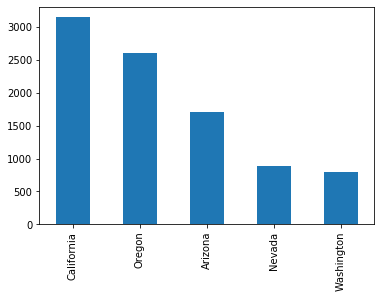

Response 

No     7826
Yes    1308
Name: Response, dtype: int64


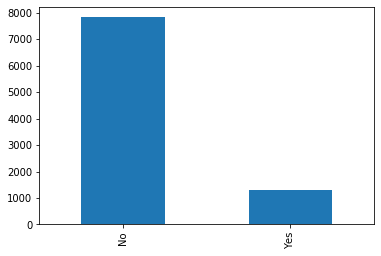

Coverage 

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64


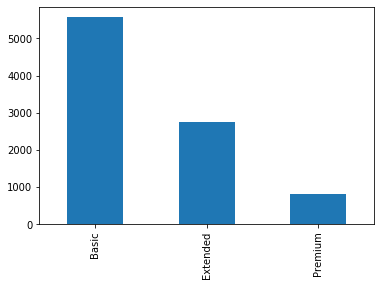

Education 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64


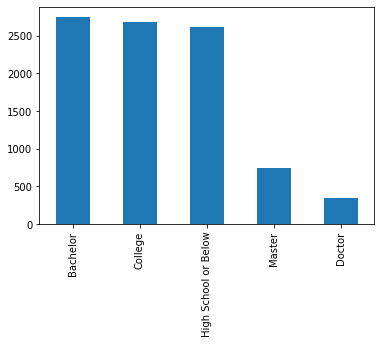

EmploymentStatus 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64


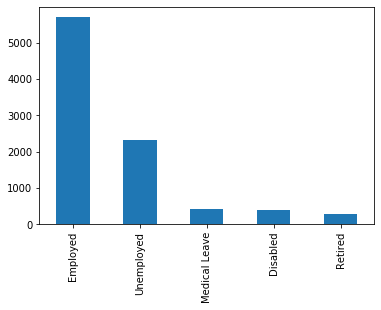

Gender 

F    4658
M    4476
Name: Gender, dtype: int64


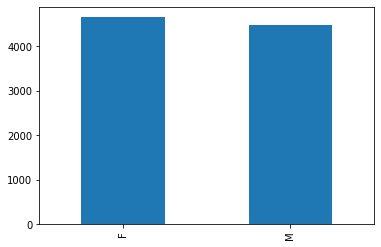

Location Code 

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64


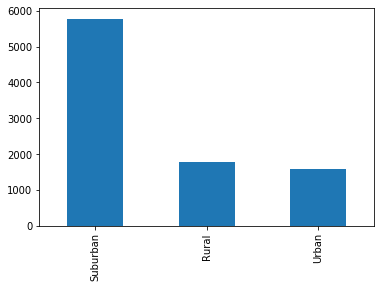

Marital Status 

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64


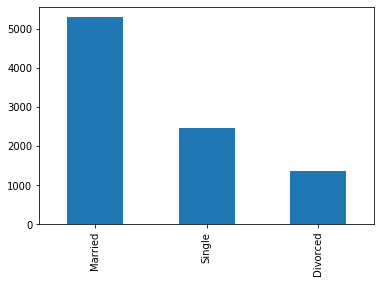

Policy Type 

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64


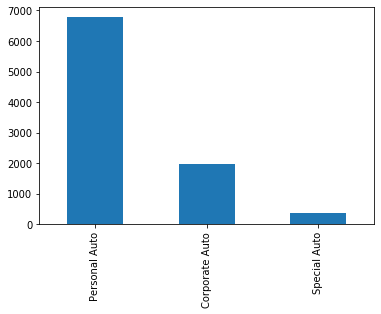

Policy 

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64


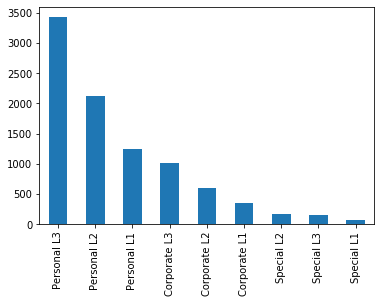

Renew Offer Type 

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64


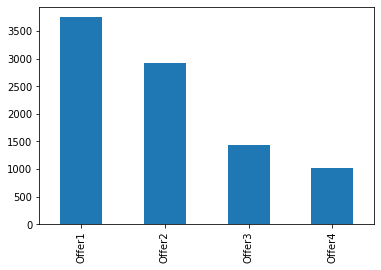

Sales Channel 

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64


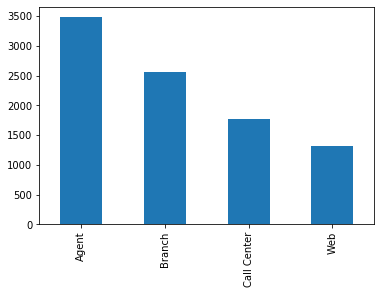

Vehicle Class 

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64


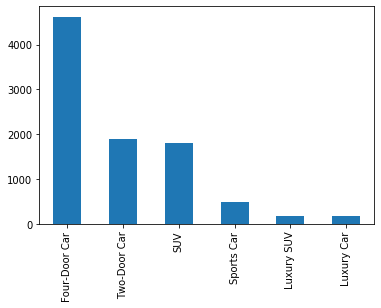

Vehicle Size 

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


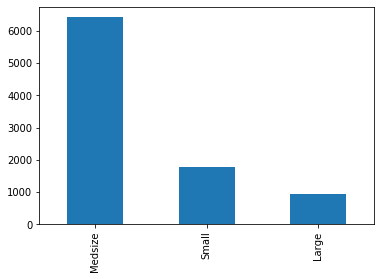

In [16]:
for x in cat_cols:
    print(x,'\n')
    print(df[x].value_counts())
    df[x].value_counts().plot.bar()
    plt.show()

Number of Open Complaints 

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64


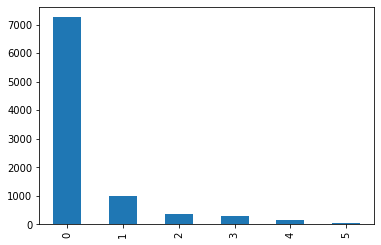

Number of Policies 

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64


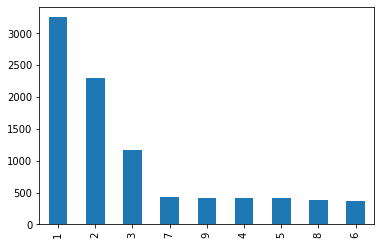

In [17]:
for y in ['Number of Open Complaints','Number of Policies']:
    print(y,'\n')
    print(df[y].value_counts())
    df[y].value_counts().plot.bar()
    plt.show()

since our dependent variable is continous, we can make a boxplot and distplot.

Boxplot is used to check outliers.

Distplot is used to check normality. 

# Univariate Analysis of Numerical Variables using Box Plot

### DEPENDENT VARIABLE

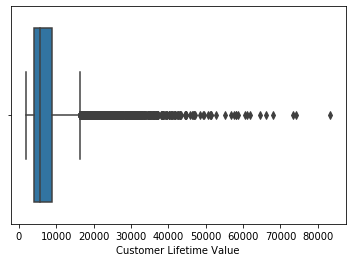

In [18]:
sns.boxplot(df['Customer Lifetime Value'])

### INDEPENDENT VARIABLE

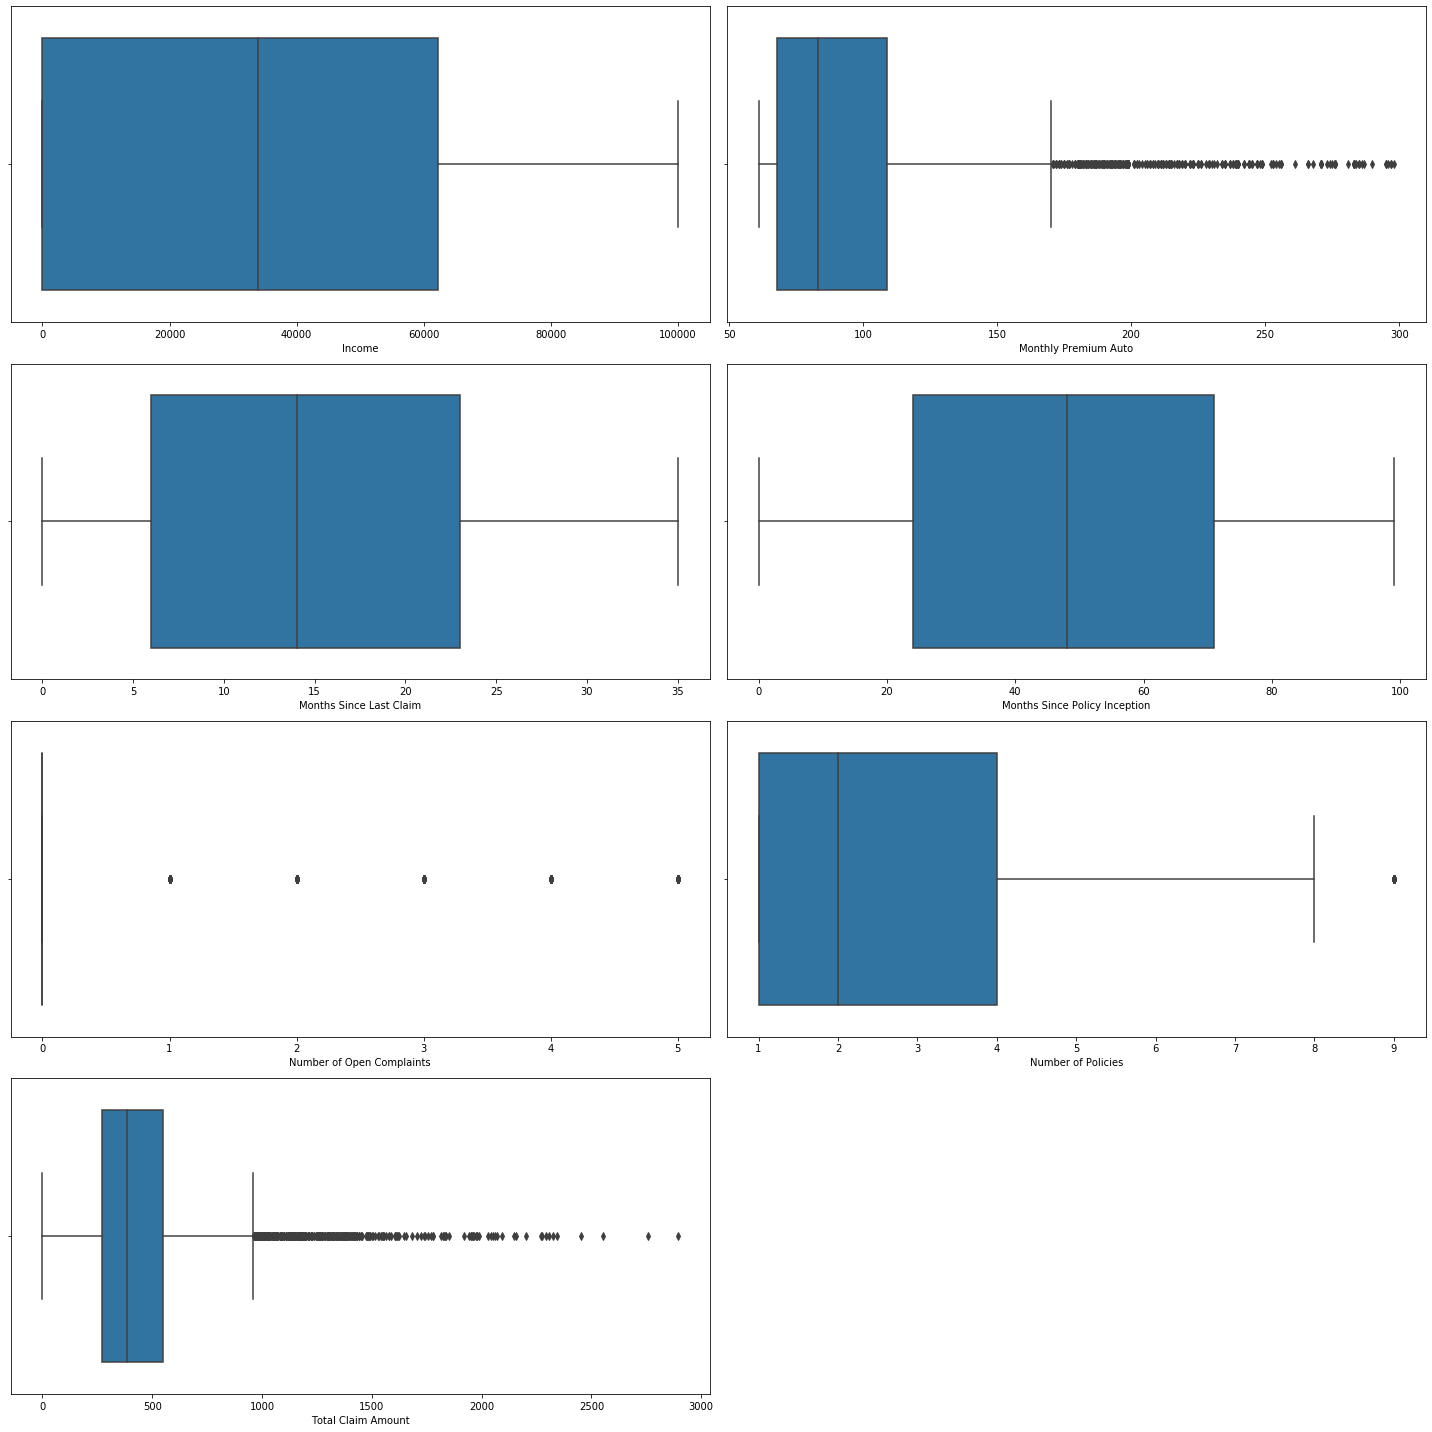

In [19]:
def draw_boxplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features[1:]):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(dataframe[feature],ax=ax)
        
    fig.tight_layout()  
    plt.show()
    
draw_boxplots(df,num_cols,4,2)

## Outliers Calculation

In [20]:
for column in num_cols:    
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)
    

Number of outliers in "Customer Lifetime Value" : 817
-3457.6210762500014
16414.039911750002
4967.915247000001
Number of outliers in "Income" : 0
-93480.0
155800.0
62320.0
Number of outliers in "Monthly Premium Auto" : 430
6.5
170.5
41.0
Number of outliers in "Months Since Last Claim" : 0
-19.5
48.5
17.0
Number of outliers in "Months Since Policy Inception" : 0
-46.5
141.5
47.0
Number of outliers in "Number of Open Complaints" : 1882
0.0
0.0
0.0
Number of outliers in "Number of Policies" : 416
-3.5
8.5
3.0
Number of outliers in "Total Claim Amount" : 453
-140.62664687500018
960.3997301250002
275.2565942500001


### As we can see that there are outlier's in the total claim amount feature,Monthly Premium Auto feature and also the Customer Lifetime Value feature.
### the general trend is to remove the outlier's, for a better model , since our DOMAIN is related to insurance and banking industry, we must be accepting the outlier's as they are the potential high revenue making customer's and there is no outlier's in the income feature as well.
### Though the feature's months since policy inception, months since last claim, number of open complaints and number of policies are all numerical, but they are discrete number's and we will consider them as categorical feature.
### so, WE ARE NOT DOING ANY OUTLIER TREATMENT.

# Univariate Analysis of Numerical Variables using Distribution Plot

### DEPENDENT VARIABLE

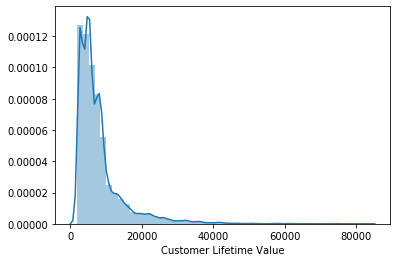

In [21]:
sns.distplot(df['Customer Lifetime Value'])

### INDEPENDENT VARIABLE

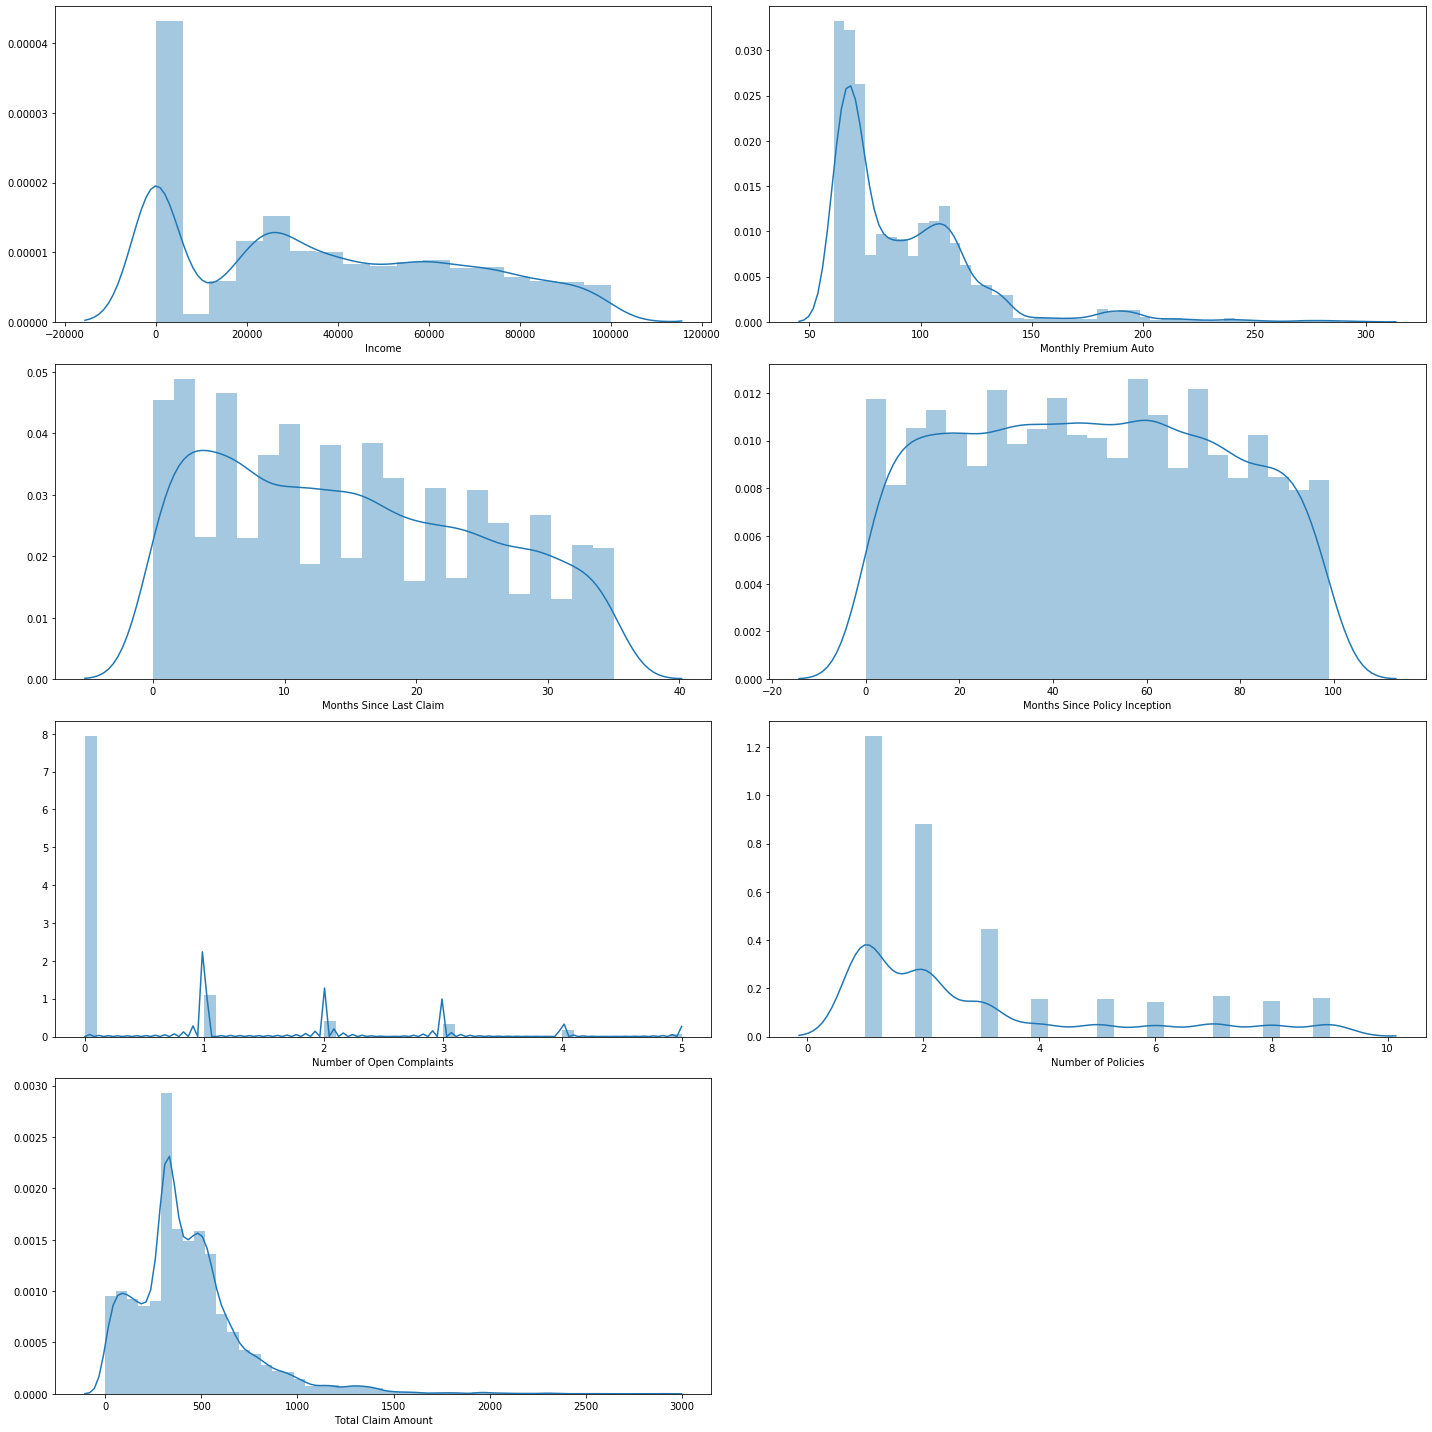

In [22]:
def draw_distplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features[1:]):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.distplot(dataframe[feature],ax=ax)
        
    fig.tight_layout()  
    plt.show()
    
draw_distplots(df,num_cols,4,2)

### As we can see that none of the continuous features are normally distributed, no matter what distribution a particular feature tend's to follow ,we as data analyst, we are inclined to make it normal, but there is a possible chance that the feature may follow some other distribution, So in our case , we want to make the distribution's normal, we can apply some transformation's to the data and see if we can achieve a normally distributed feature.

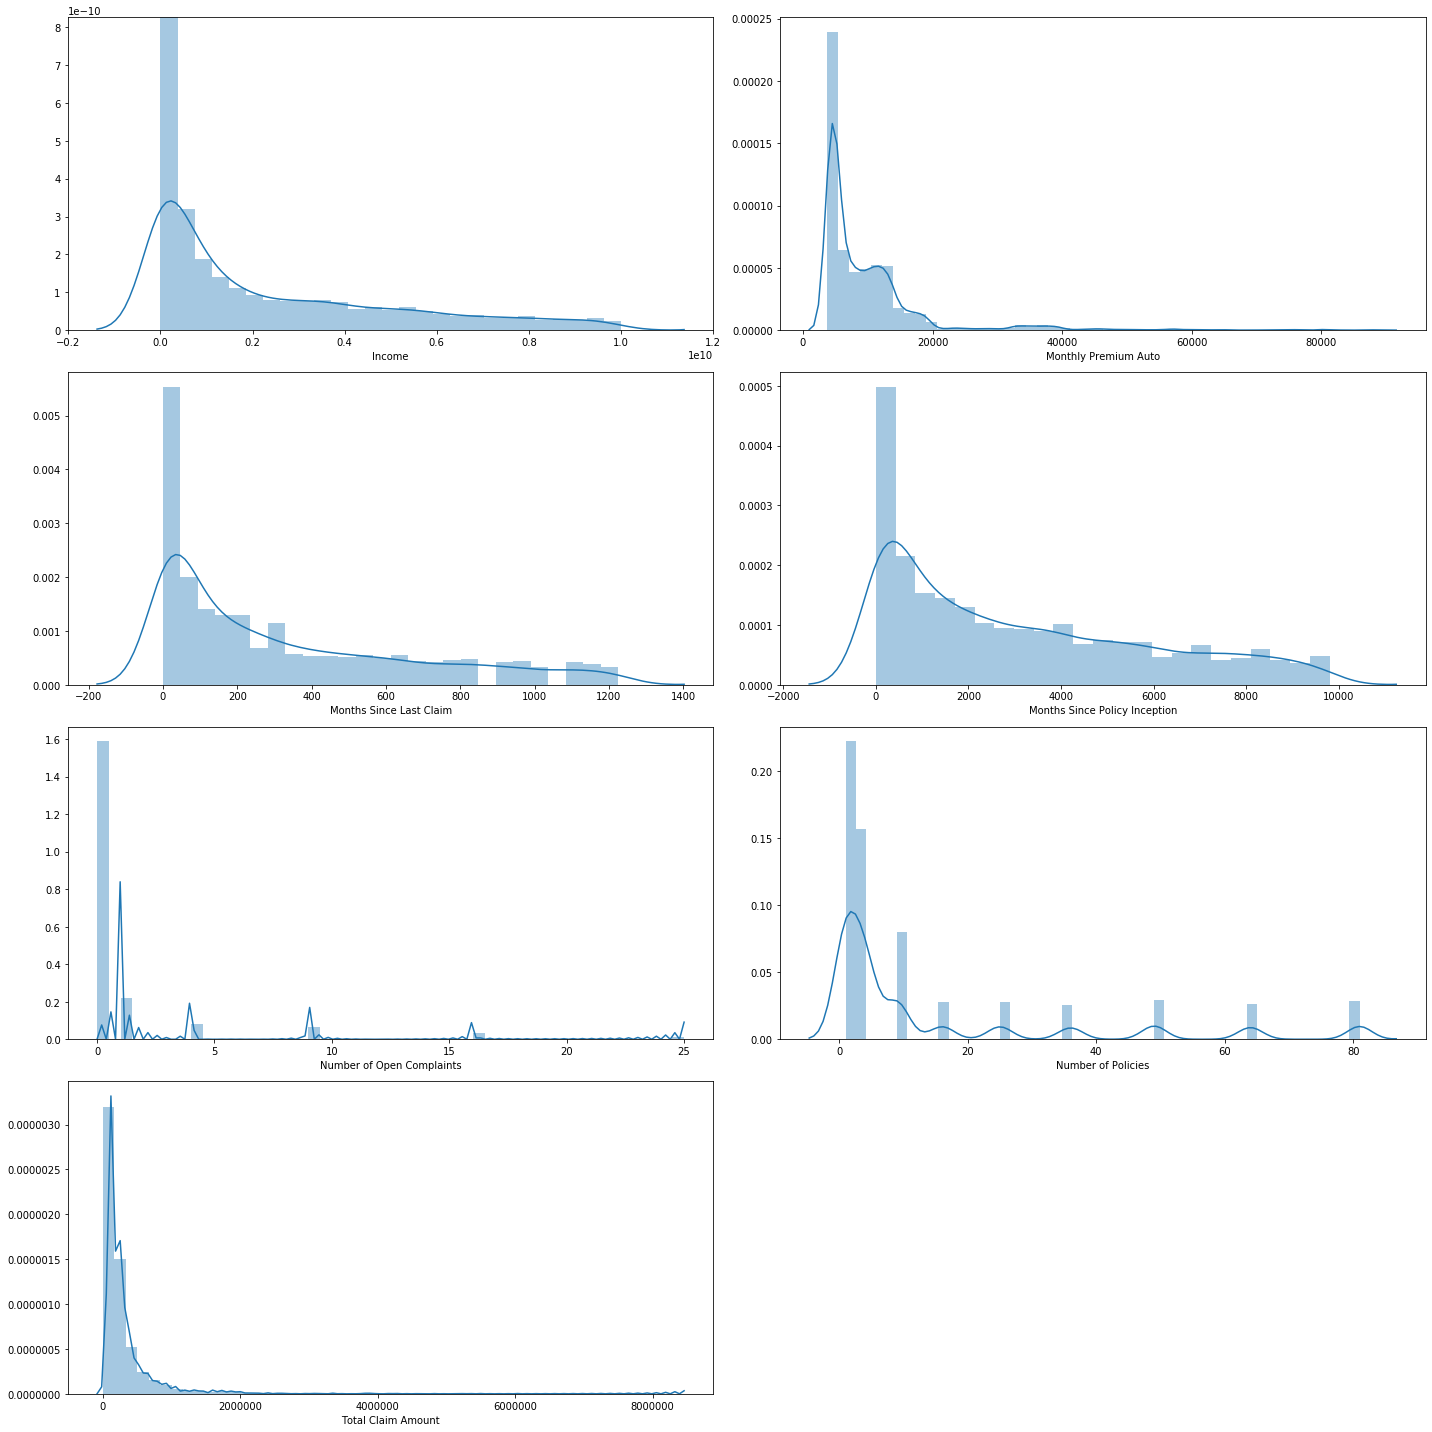

In [23]:
def draw_distplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features[1:]):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.distplot(dataframe[feature]**2,ax=ax)
        
    fig.tight_layout()  
    plt.show()
    
draw_distplots(df,num_cols,4,2)

#### The monthly premium auto  and income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE) but as we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again

#### As we can see that while we are trying to transform the data to make it normal,rather the distribution is getting skewed, or is having multiple peaks which again is a problem to our model, hence we just stick with the same distribution of the feature.


#### Again for the total claim amount after applying the transformation's the data is getting left skewed, and hence we stick to the actual distibution of the data.

### Conclusion: No matter what power transformation we are applying to the numerical features, it is still not getting normally distributed, and moreover the data is getting skewed, so rather we will just stick with the actual distribution of the feature in our model building

# Univariate Analysis of Catagorical Variables using Count Plot

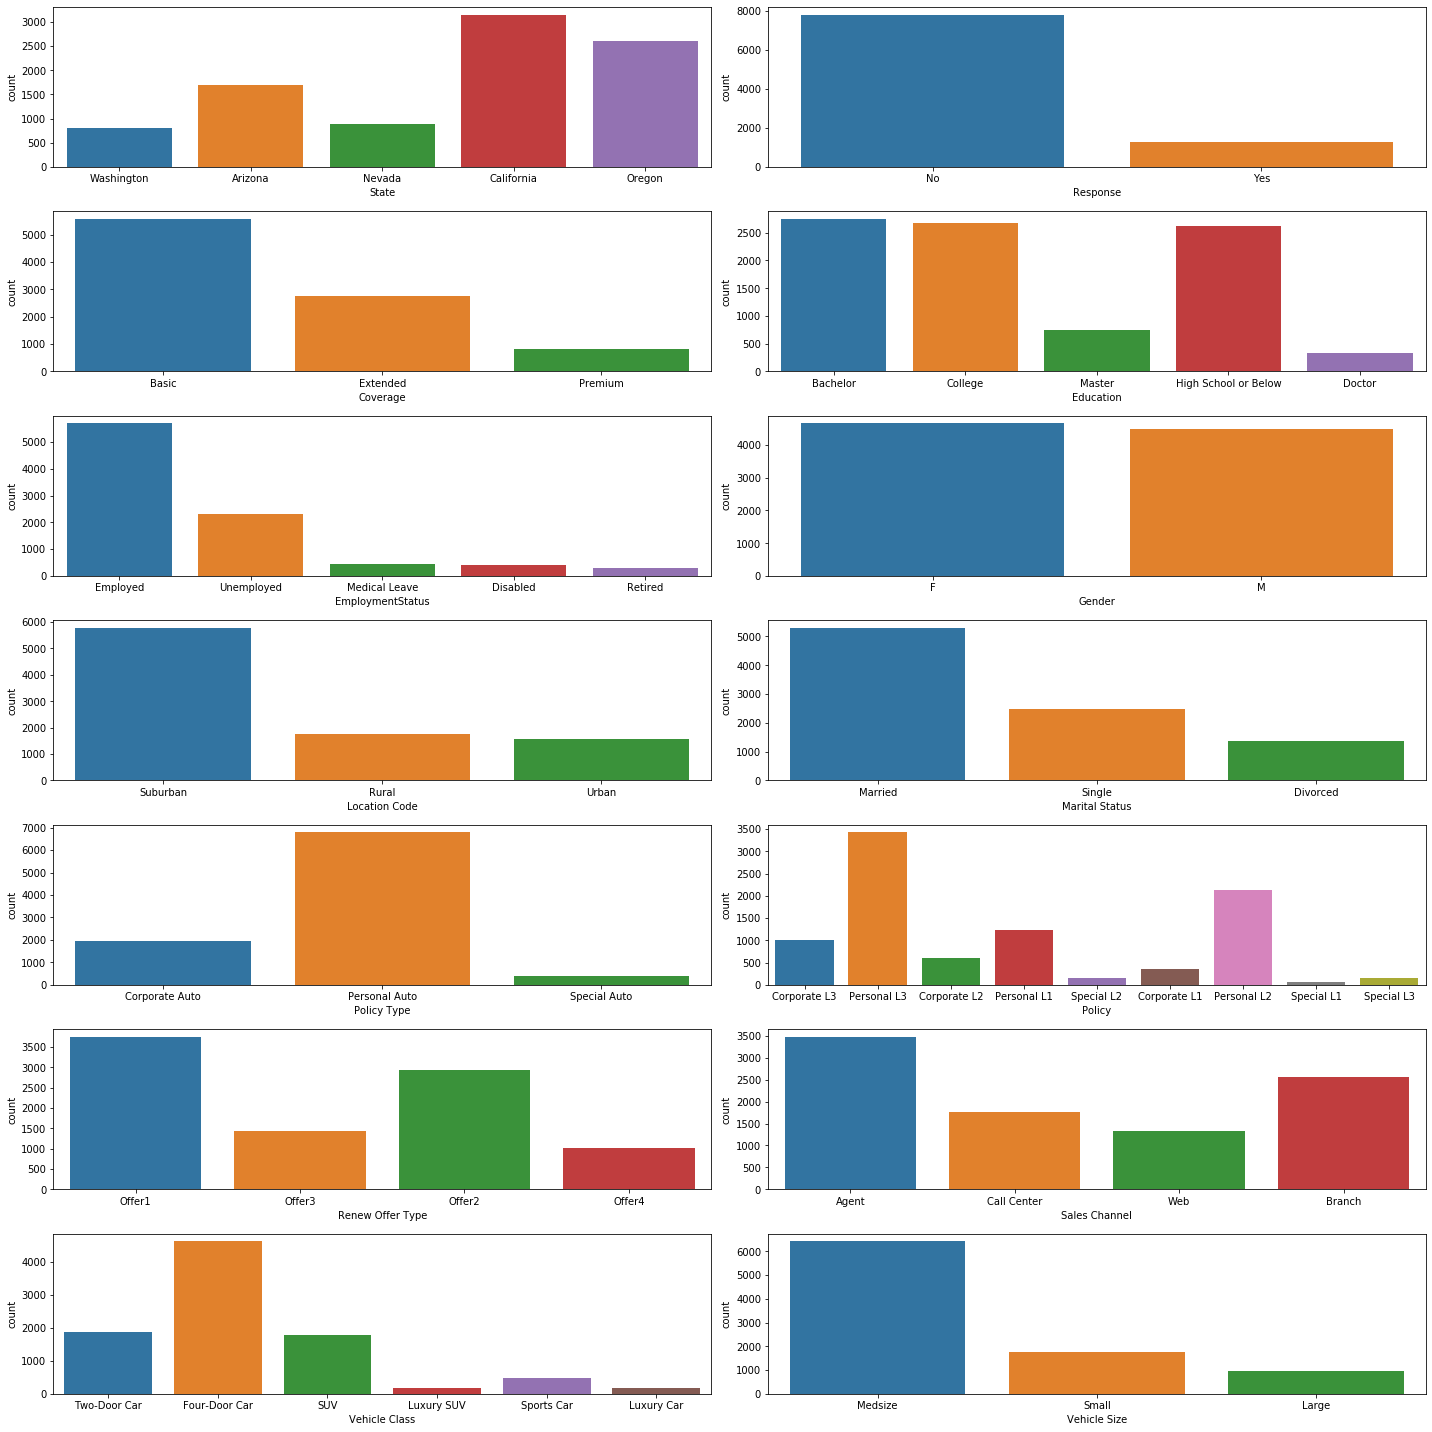

In [24]:
fig, ax = plt.subplots(7,2,figsize=(20,20))
ax = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(df[col], ax = ax[i])
    
plt.tight_layout()
plt.show()

# Bivariate Analysis between Dependent Variable("Customer Lifetime Value" )and Independent Variables(Numerical Variables) using Scatter Plot

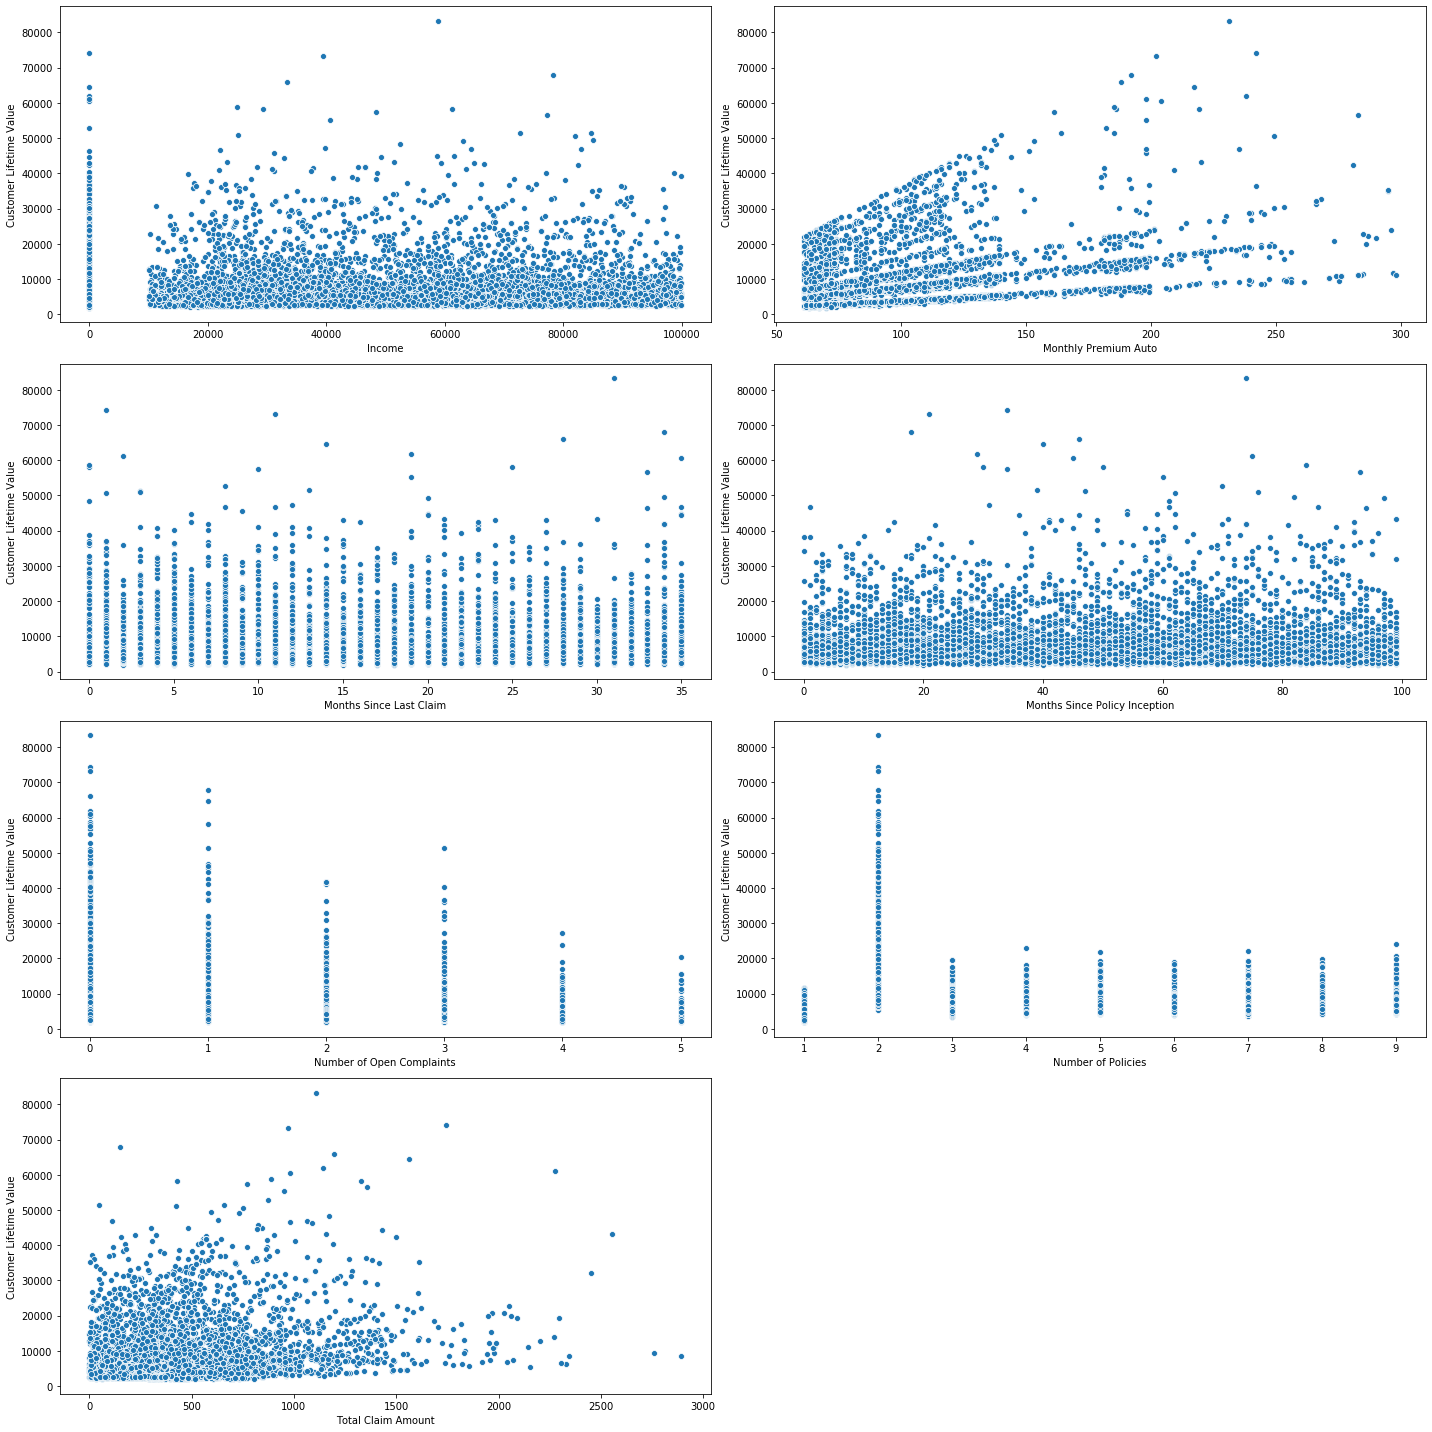

In [25]:
def draw_scatterplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features[1:]):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.scatterplot(dataframe[feature],dataframe['Customer Lifetime Value'],ax=ax)
        
    fig.tight_layout()  
    plt.show()
    
draw_scatterplots(df,num_cols,4,2)

## We can clearly see that there is a linear relationship between Customer lifetime value and monthly premium auto, but we do not see any relationship between income and the total claim amount.

# Bivariate Analysis between Variables using BAR Plot

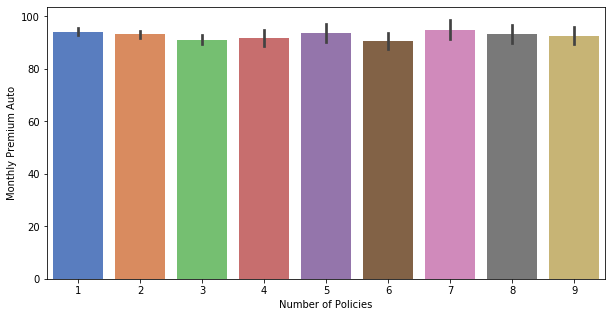

In [26]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y='Monthly Premium Auto', x='Number of Policies', data=df,palette='muted');

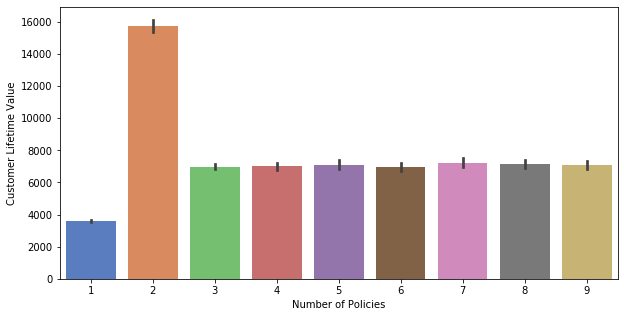

In [27]:

plt.figure(figsize=(10,5))
ax = sns.barplot(y='Customer Lifetime Value', x='Number of Policies', data=df,palette='muted');

## We can see a pattern here, customer's who have taken only 1 policy have lower customer lifetime value, and customer's who have taken 3 or greater show a similar trend, so we can segment all the customer who have taken number of policies 3 or greater into one separate segment, and suprisingly we can also see that the customer's who have taken 2 policies have very high customer lifetime value comparitively, which is challenging part to answer why, domain knowledge is much required here.

In [28]:
df['Number of Policies'] = np.where(df['Number of Policies']>2,3,df['Number of Policies'])

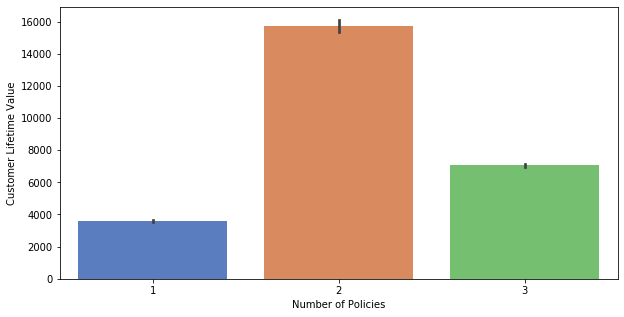

In [29]:

plt.figure(figsize=(10,5))
ax = sns.barplot(y='Customer Lifetime Value', x='Number of Policies', data=df,palette='muted');

# Bivariate Analysis between Dependent Variable("Customer Lifetime Value" )and Independent Variables(Numerical Variables) using Joint Plot

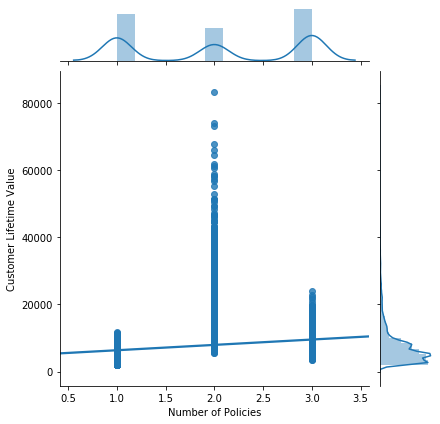

In [30]:
sns.jointplot(y='Customer Lifetime Value', x='Number of Policies', data=df,kind='reg')

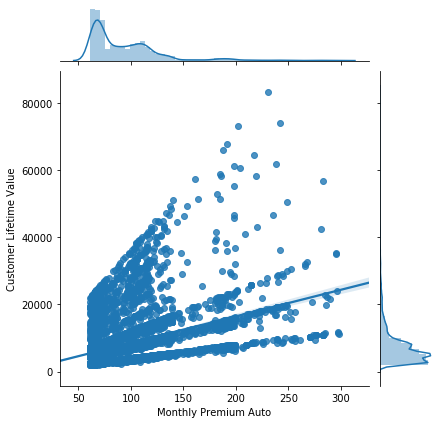

In [31]:
sns.jointplot(y='Customer Lifetime Value', x='Monthly Premium Auto', data=df,kind='reg')

## We can clearly see that there is a linear relationship between Customer lifetime value and monthly premium auto, but we do not see any relationship between income and the total claim amount.

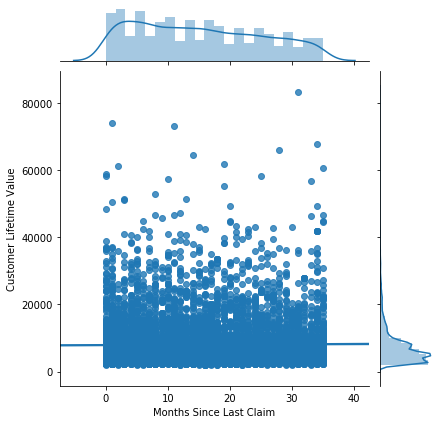

In [32]:
sns.jointplot(y='Customer Lifetime Value', x='Months Since Last Claim', data=df,kind='reg')

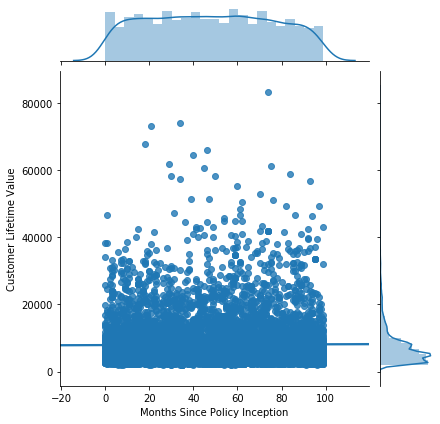

In [33]:
sns.jointplot(y='Customer Lifetime Value', x='Months Since Policy Inception', data=df,kind='reg')

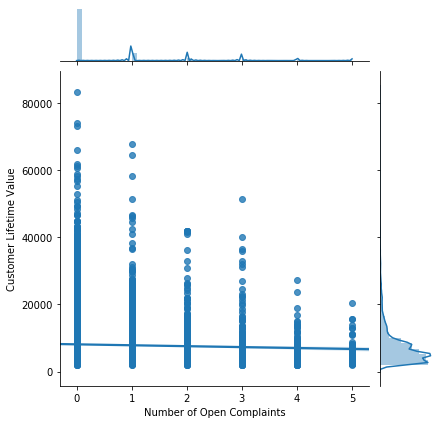

In [34]:
sns.jointplot(y='Customer Lifetime Value', x='Number of Open Complaints', data=df,kind='reg')

In [35]:
df[['Vehicle Class', 'Customer Lifetime Value']].groupby("Vehicle Class").mean().reset_index().sort_values("Customer Lifetime Value", ascending=False)

,Vehicle Class,Customer Lifetime Value
2,Luxury SUV,17122.999134
1,Luxury Car,17053.348399
4,Sports Car,10750.989331
3,SUV,10443.511816
5,Two-Door Car,6671.030732
0,Four-Door Car,6631.726607


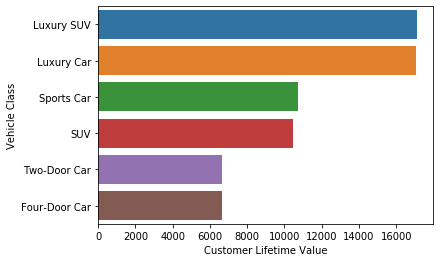

In [36]:
d1=df[['Vehicle Class', 'Customer Lifetime Value']].groupby("Vehicle Class").mean().reset_index().sort_values("Customer Lifetime Value", ascending=False)
sns.barplot(y='Vehicle Class',x= 'Customer Lifetime Value',data = d1)

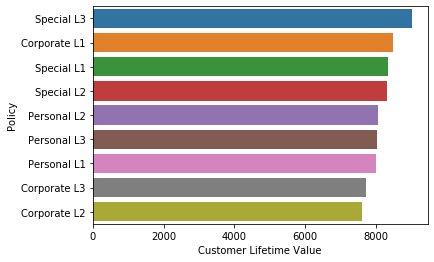

In [37]:
d2=df[['Policy', 'Customer Lifetime Value']].groupby("Policy").mean().reset_index().sort_values("Customer Lifetime Value", ascending=False)
sns.barplot(y='Policy',x= 'Customer Lifetime Value',data = d2)

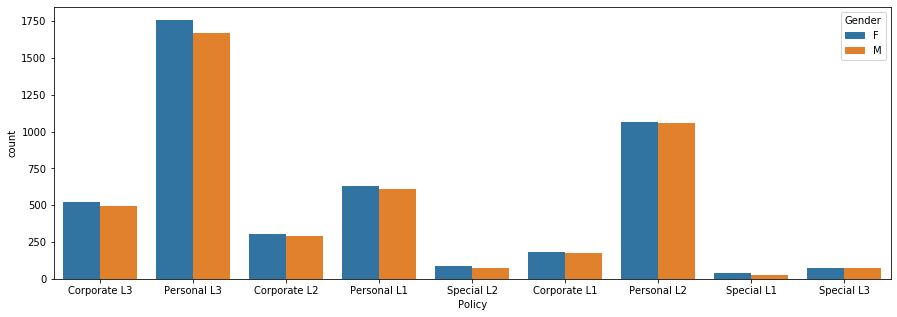

In [38]:
fig, axes = plt.subplots(1,1, figsize = (15,5))
sns.countplot(x = df['Policy'], hue = df["Gender"])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9134 non-null int64
Policy Type                      9134 non-null object
Policy                           9

In [40]:
cat_cols2=df.select_dtypes(['object']).columns
cat_cols2

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

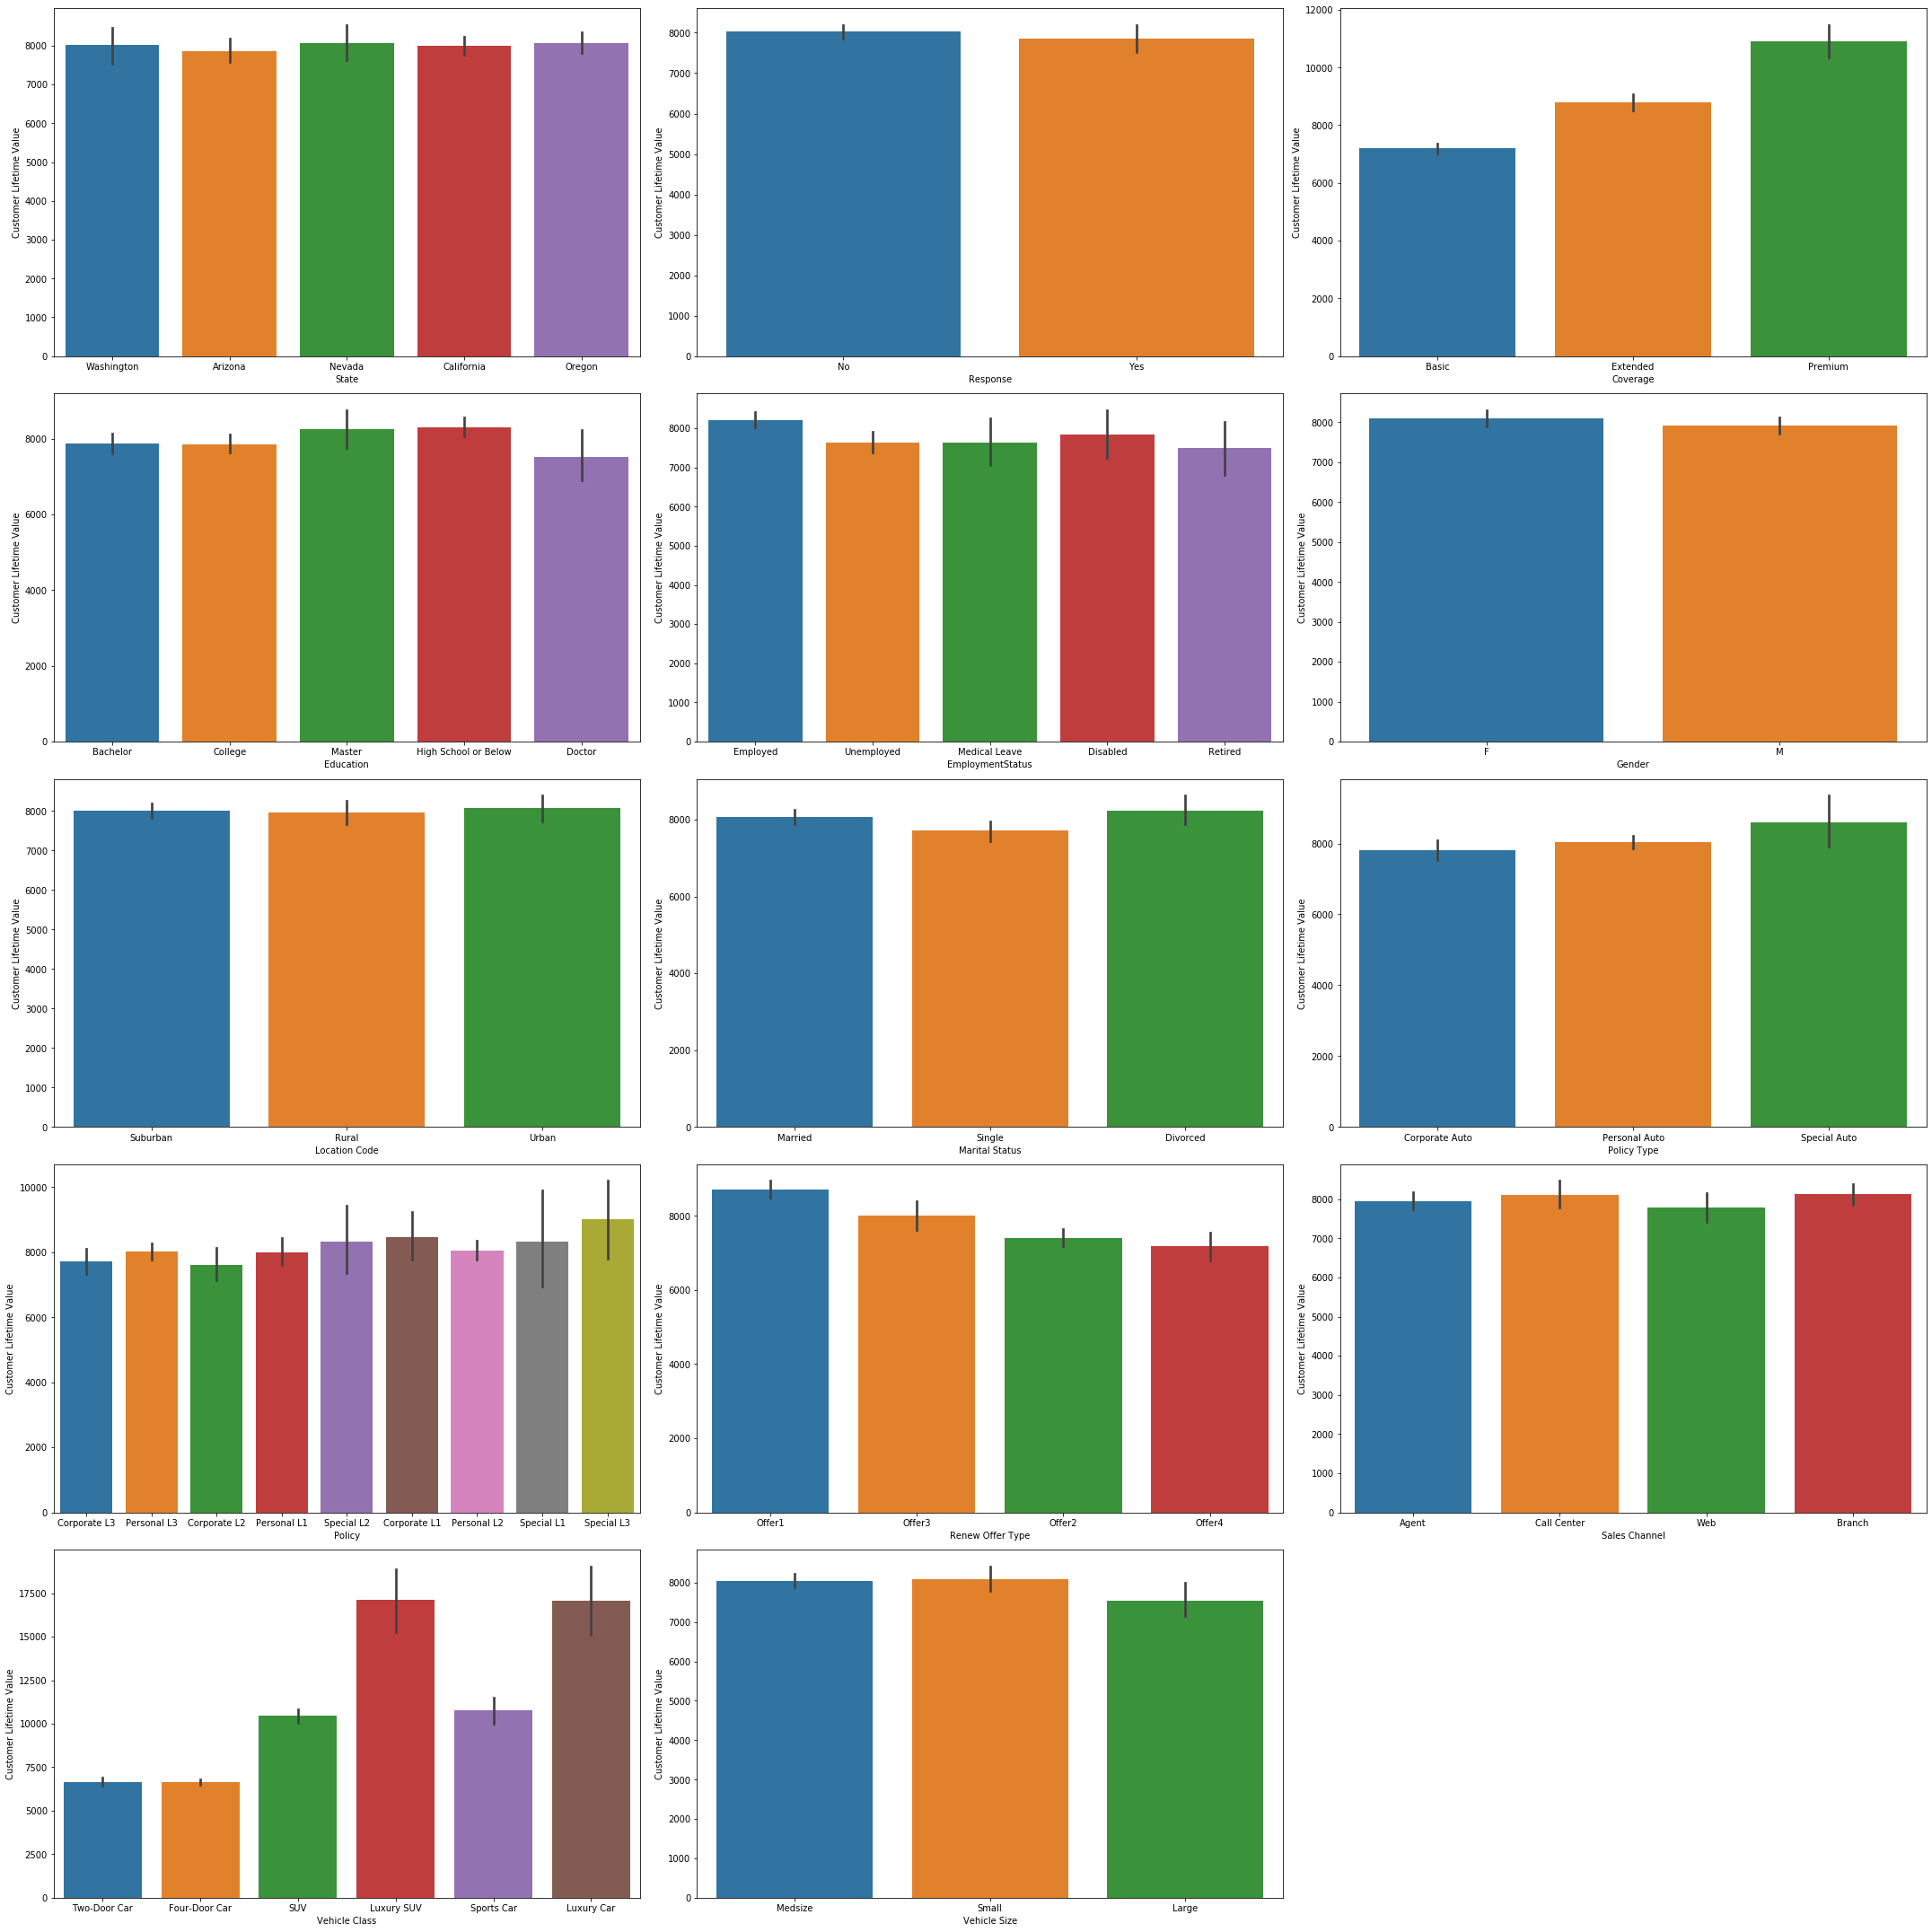

In [41]:
def draw_barplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.barplot(dataframe[feature],dataframe['Customer Lifetime Value'],ax=ax)
        
    fig.tight_layout()  
    plt.show()
    
draw_barplots(df,cat_cols2,5,3)

## The average customer lifetime value of the customer who stay in different location code's is the same so while creating the model we can dis regard the feature.

## The average customer lifetime value of the customer who stay in different state is the same so while creating the model we can dis regard the feature.

## It doesn't matter if the customer take's the marketing call, or he doesn't as the average customer lifetime value for both of them is the same.

## Our model , is not biased based on gender, but still we can see that the average customer lifetime value is the same for both male and female.

## We can also see that education is not a significant feature for assesing the lifetime value of the customer.

## There isn't much difference in the customer lifetime value W.R.T what policy type he has taken, all we need is how much revenue a customer can bring to the company, so it doesnt matter what type of policy he/she has chosen.

## Customer Lifetime Value is different for different coverage, as we can also see that visually which make's sense, better the coverage better the monthly premium amount a custoemr pay's , better the revenue from that particular customer.

## Number of open complaint's also show kind of similar trend, where people who have complaints 2 or lesser have a similar pattern but where as >3 do not show any pattern we will have to do statistical test's to understand if this feature is really significant or it isn't.

# MultiVariate Analysis

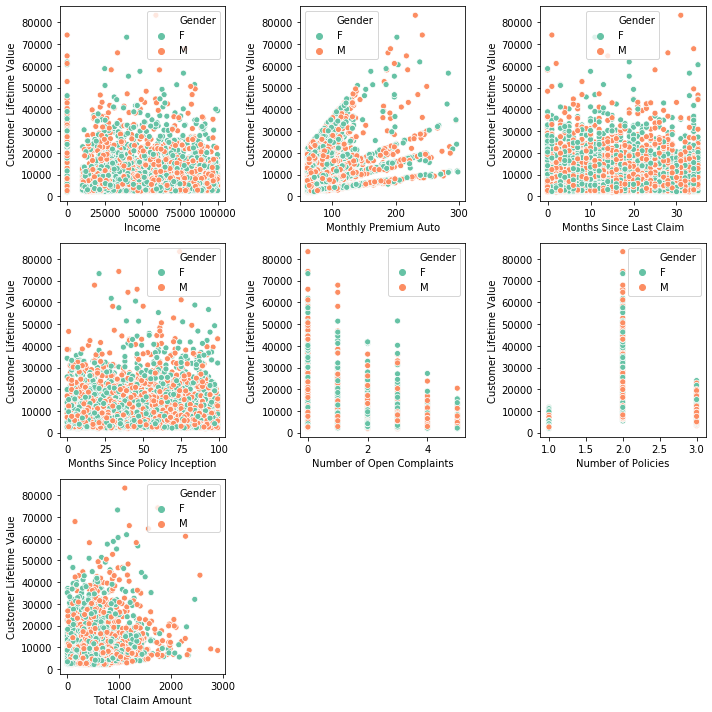

In [42]:
def draw_scatterplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(10,10))
    for i, feature in enumerate(features[1:]):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.scatterplot(dataframe[feature],dataframe['Customer Lifetime Value'],ax=ax,hue=dataframe['Gender'], palette='Set2')
        
    fig.tight_layout()  
    plt.show()
    
draw_scatterplots(df,num_cols,3,3)

## Customer Lifetime Value does not  based on gender, but still we can see that the average customer lifetime value is the evenly distributed for both male and female.

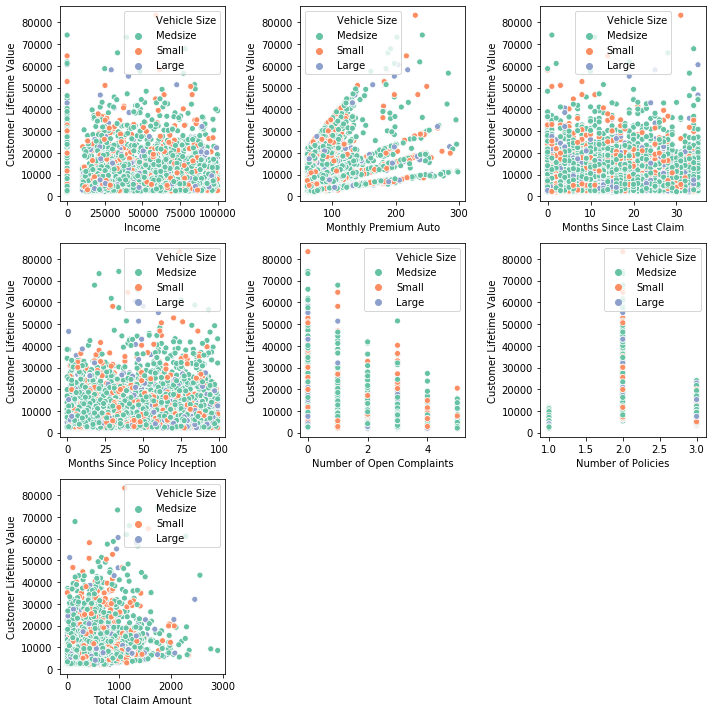

In [43]:
def draw_scatterplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(10,10))
    for i, feature in enumerate(features[1:]):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.scatterplot(dataframe[feature],dataframe['Customer Lifetime Value'],ax=ax,hue=dataframe['Vehicle Size'], palette='Set2')
        
    fig.tight_layout()  
    plt.show()
    
draw_scatterplots(df,num_cols,3,3)

### Customer Lifetime Value does not based on vehicle size as well, but still we can see that the average customer lifetime value is the evenly distributed for all types of vehicle sizes.We can also see that Vehicle Size is not a significant feature for assesing the lifetime value of the customer.

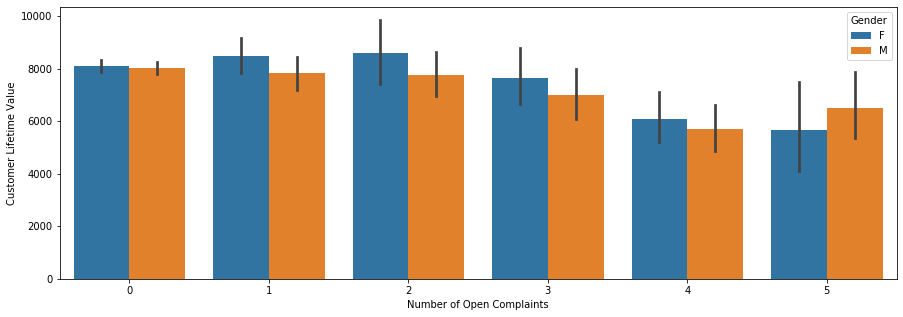

In [44]:
plt.figure(figsize=(15,5))

sns.barplot(data=df,y='Customer Lifetime Value',x='Number of Open Complaints',hue='Gender')

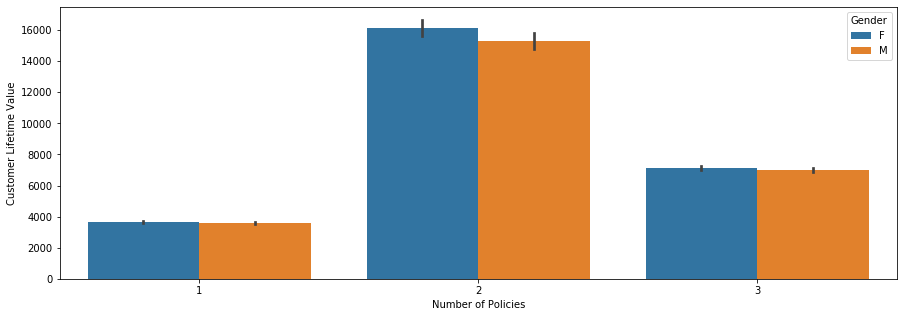

In [45]:
plt.figure(figsize=(15,5))

sns.barplot(data=df,y='Customer Lifetime Value',x='Number of Policies',hue='Gender')

# Statistical Analysis

In [46]:
df.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.200713,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.004636,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.024295,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.011217,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.005209,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.000428,-0.014241
Number of Policies,0.200713,-0.004636,-0.024295,0.011217,-0.005209,0.000428,1.000000,-0.017066
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.017066,1.000000


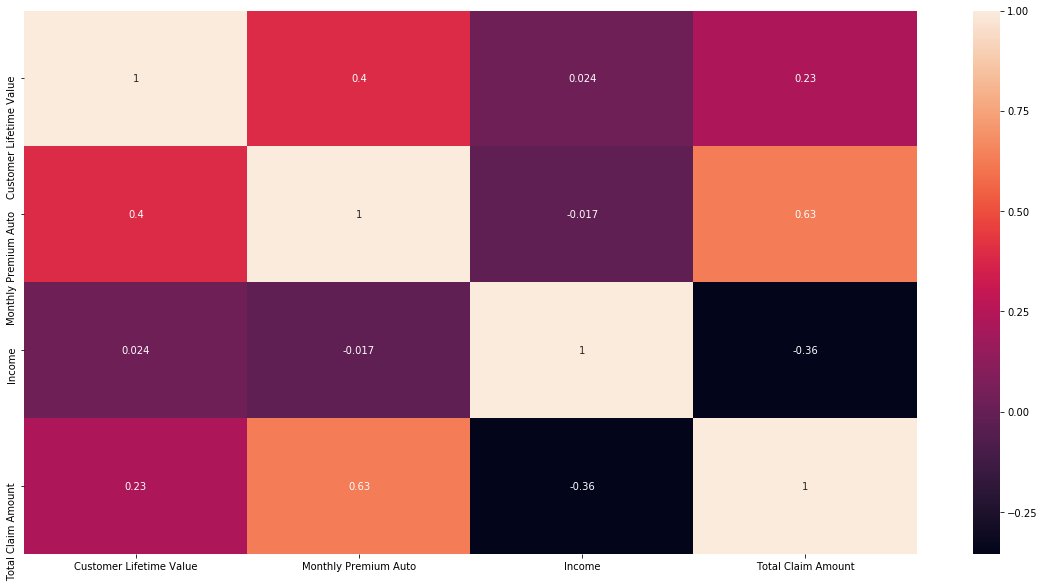

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(df[['Customer Lifetime Value','Monthly Premium Auto','Income','Total Claim Amount']].corr(),annot = True)
plt.show()

## And we can clearly see in the co relation map, that customer lifetime value has a better co relation with monthly premium auto and acceptable co relation with total claim amount, but it show's no relationship with income, so again with all the visualization's we can come to the conclusion that we can dis regard the INCOME feature

In [48]:
for x in df.columns:
    if len(str.split(x))>=2:
        y=str.split(x)
        z=str.join('_',y)
        df.rename(columns={x:z},inplace=True)

In [49]:
df.columns

Index(['State', 'Customer_Lifetime_Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location_Code',
       'Marital_Status', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Total_Claim_Amount', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [50]:
df.select_dtypes('object').columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location_Code', 'Marital_Status', 'Policy_Type', 'Policy',
       'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

# CONVERTING CATEGORICAL COLUMNS FROM STRING TO NUMERICAL USING LABEL ENCODING¶

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
labelencoder = LabelEncoder()

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if(df[col].dtype == 'object'):
        df.loc[:,col] = le.fit_transform(df.loc[:,col])

In [54]:
df.head()

,State,Customer_Lifetime_Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,...,42,0,3,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,...,65,0,3,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1


In [55]:
df.columns

Index(['State', 'Customer_Lifetime_Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location_Code',
       'Marital_Status', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Total_Claim_Amount', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

# BASE MODEL USING OLS.

In [56]:
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [57]:
X1 = df.drop('Customer_Lifetime_Value',axis=1)
y1 = df["Customer_Lifetime_Value"]

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
State                            9134 non-null int32
Customer_Lifetime_Value          9134 non-null float64
Response                         9134 non-null int32
Coverage                         9134 non-null int32
Education                        9134 non-null int32
EmploymentStatus                 9134 non-null int32
Gender                           9134 non-null int32
Income                           9134 non-null int64
Location_Code                    9134 non-null int32
Marital_Status                   9134 non-null int32
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception    9134 non-null int64
Number_of_Open_Complaints        9134 non-null int64
Number_of_Policies               9134 non-null int64
Policy_Type                      9134 non-null int32
Policy                           9134 non-n

In [59]:
from statsmodels.tools import add_constant as add_constant
X_constant=add_constant(X1)
result=sm.OLS(y1,X_constant).fit()
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.207
Model:                                 OLS   Adj. R-squared:                  0.205
Method:                      Least Squares   F-statistic:                     113.1
Date:                     Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                             15:46:04   Log-Likelihood:                -92602.
No. Observations:                     9134   AIC:                         1.852e+05
Df Residuals:                         9112   BIC:                         1.854e+05
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

## CHECKING ASSUMPTIONS FOR LINEAR REGRESSION

## Linearity

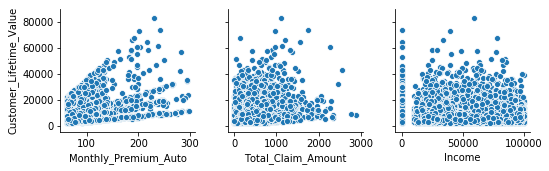

In [60]:
sns.pairplot(x_vars=['Monthly_Premium_Auto','Total_Claim_Amount','Income'],y_vars =['Customer_Lifetime_Value'],data = df)
plt.show()

#### We don't see any linear relationship between the variables and the Y varible , which fail's the first assumption of linear regression.

## Mean Of Residuals

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state = 100)

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
residuals = y_pred-y_test
mean_of_residuals = np.mean(residuals)
print(f"The mean of the residuals is {mean_of_residuals}")

The mean of the residuals is -32.425252065482354


#### The 2nd assumption is that the mean of the residual's must be close to zero, which again fail's

## HomoScedasticity

In [63]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals,X_test)
lzip(name, test)

[('F statistic', 1.4073046692392246), ('p-value', 1.92923572579185e-10)]

- H0: Error terms are homoscedastic
- Ha: Error terms are not homoscedastic

#### p-value < 0.05 reject null hypothesis, error terms are not homoscedastic

## Test of normality of residuals

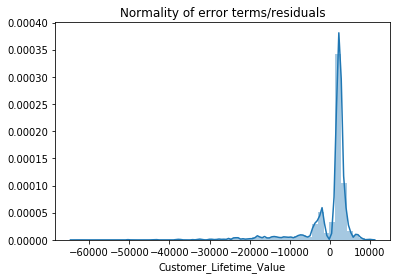

In [64]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

#### The distribution clearly show's that the residuals are not normally distributed, and the third assumption also fail's.

## Auto Correlation

In [65]:
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

In [66]:
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.13044717939496045

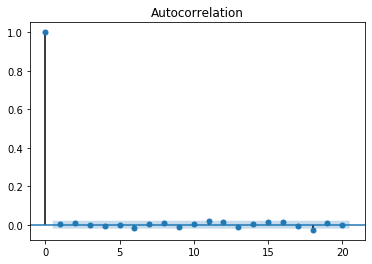

In [67]:

acf=smt.graphics.plot_acf(result.resid, lags=20,alpha=0.05)
acf.show()

- Ho: Auto correlation is absent
- Ha: Auto correlation is present
#### The P-value is >0.05 ,we fail to reject the null hypothesis, auto co relation is absent.

In [68]:
from scipy import stats
print(stats.jarque_bera(result.resid))

(81241.37446122797, 0.0)


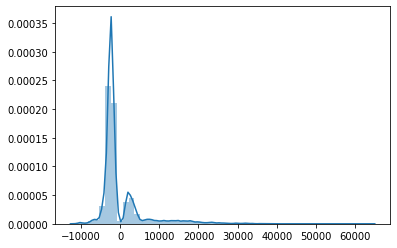

In [69]:
import seaborn as sns
sns.distplot(result.resid)

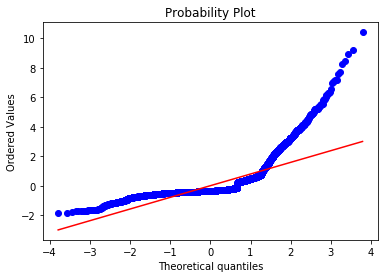

In [70]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=result, frac=0.5)

import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = result.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

[('F statistic', 1.239880630906859), ('p-value', 2.2362412637884343e-13)]

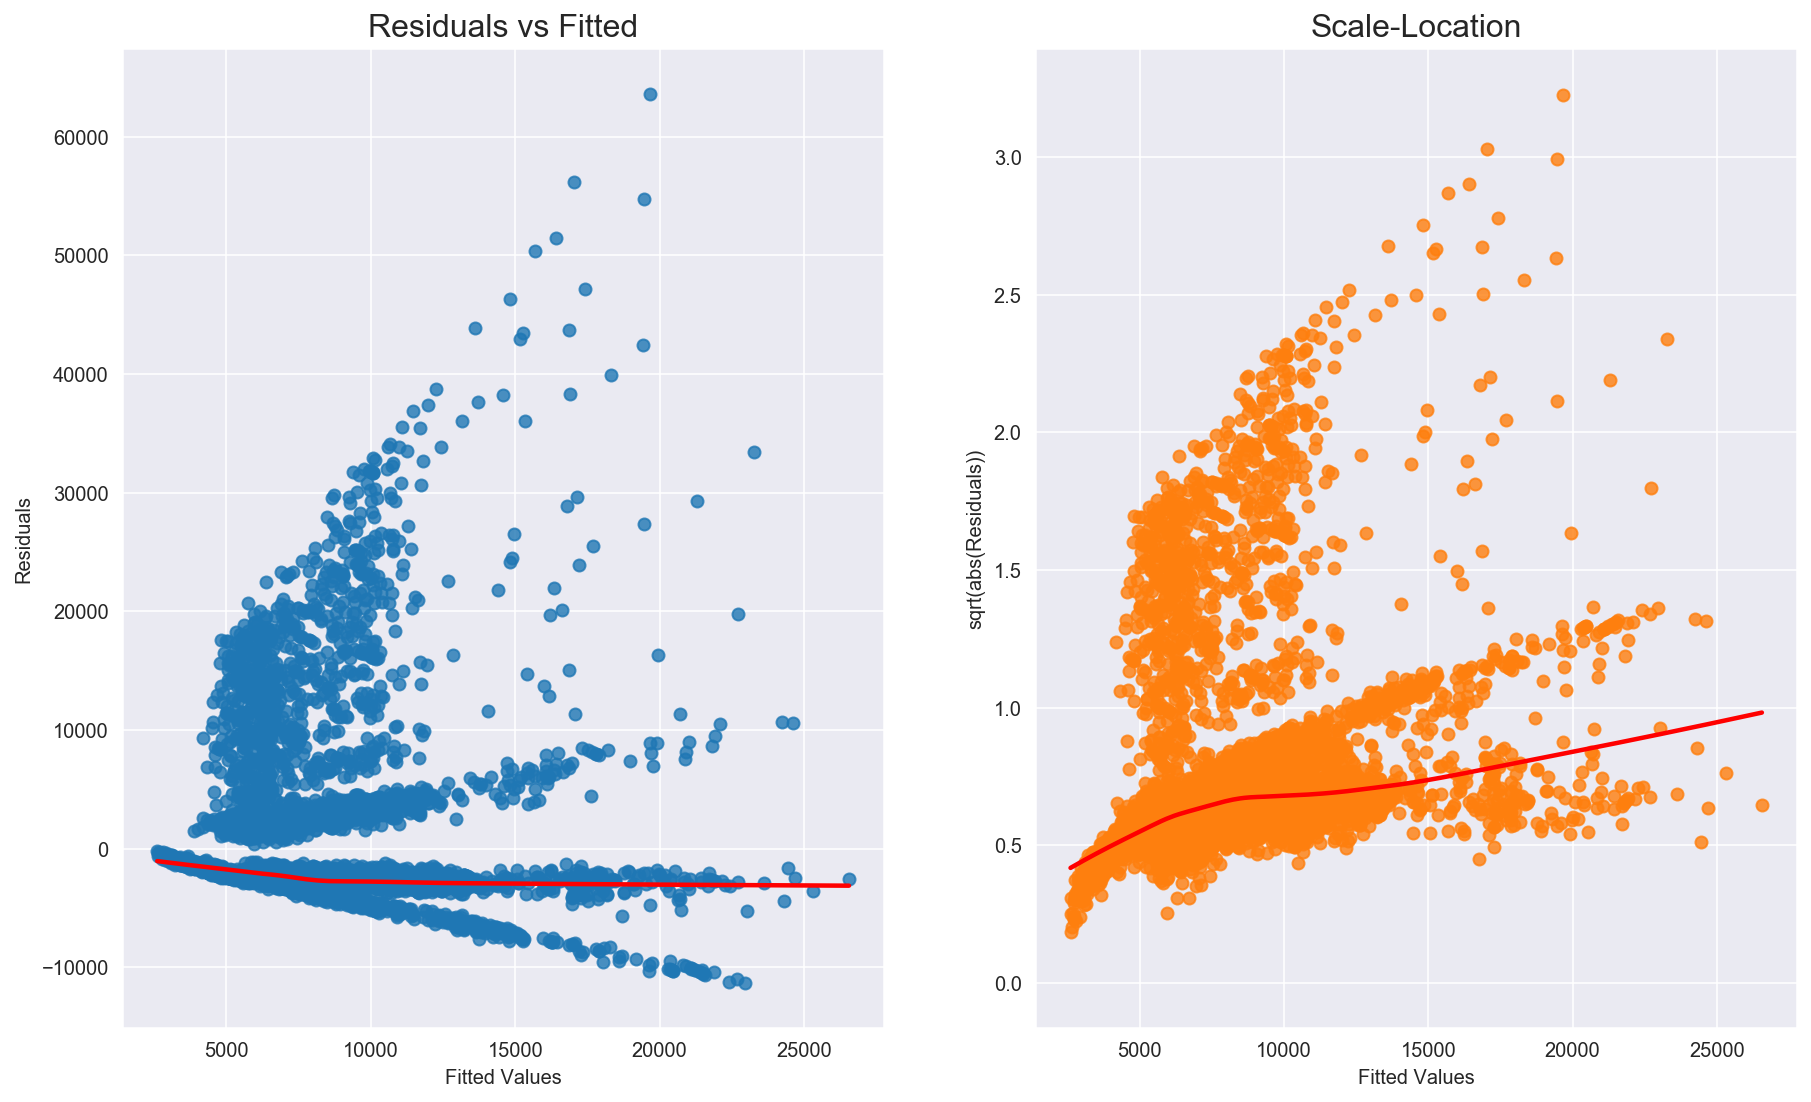

In [71]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = result
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

In [72]:
import  scipy.stats                     as  stats
import  statsmodels.stats.proportion    as  SMP 
import  numpy                           as  np
import  pandas                          as  pd
import matplotlib.pyplot as plt
import seaborn           as sns
from IPython.display import Image
import statistics

#### Considering CLTV (Customer Lifetime Value) as the target variable, we shall try to understand how each of the independent variables are contributing towards the target variable.

#### Since our target variable is a continuous variable, we will have to perform ANOVA to understand how significant are the independent variables towards target variable.

## For ANOVA,
#### Null hypothesis is that there is no significant difference among the groups
#### Alternative hypothesis is that there is at least one significant difference among the groups

## CLTV of all the features who is having more than 2 categories in it and which follow a normal distribution. for them, we can perform one way ANOVA test

In [73]:
df1=pd.read_csv("Insurance_Marketing-Customer-Value-Analysis.csv")
df1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [74]:
State = df1.groupby('State')
Washington = State.get_group('Washington')['Customer Lifetime Value']
Arizona = State.get_group('Arizona')['Customer Lifetime Value']
Nevada = State.get_group('Nevada')['Customer Lifetime Value']
California = State.get_group('California')['Customer Lifetime Value']
Oregon = State.get_group('Oregon')['Customer Lifetime Value']

In [75]:
from scipy.stats import normaltest,f_oneway
from scipy.stats import ttest_ind
for i in [Washington,Arizona,Nevada,California,Oregon]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=589.985409403956, pvalue=7.69655090624974e-129) 

NormaltestResult(statistic=1123.931182802557, pvalue=8.73865582665683e-245) 

NormaltestResult(statistic=531.43144944664, pvalue=3.9914160352323387e-116) 

NormaltestResult(statistic=2047.3388756109375, pvalue=0.0) 

NormaltestResult(statistic=1836.7206700158117, pvalue=0.0) 



In [76]:
f_oneway(Washington,Arizona,Nevada,California,Oregon)

F_onewayResult(statistic=0.27289285462119284, pvalue=0.8955985932127517)

##### ALL STATE HAVE SAME MEAN'S OF CLTV
#### pvalue > 0.05 implies that there is no significant difference in the mean of target variable which means 'State' feature is not significant for predicting 'Customer Lifetime Value'

In [77]:
Coverage = df1[['Customer Lifetime Value','Coverage']].groupby('Coverage')
basic = Coverage['Customer Lifetime Value'].get_group('Basic')
extended = Coverage['Customer Lifetime Value'].get_group('Extended')
premium = Coverage['Customer Lifetime Value'].get_group('Premium')

In [78]:
for i in [basic,extended,premium]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3458.849448301252, pvalue=0.0) 

NormaltestResult(statistic=1947.8731066934433, pvalue=0.0) 

NormaltestResult(statistic=503.3468946321326, pvalue=5.007380445967074e-110) 



In [79]:
f_oneway(basic,extended,premium)

F_onewayResult(statistic=133.67511419504908, pvalue=6.0158970099807e-58)

### MEAN'S ARE DIFFERENT FOR COVERAGE
#### pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Coverage' which means 'Coverage' feature can be a significant for predicting 'Customer Lifetime Value'

In [80]:
Education = df1[['Customer Lifetime Value','Education']].groupby('Education')
bachelor = Education['Customer Lifetime Value'].get_group('Bachelor')
college = Education['Customer Lifetime Value'].get_group('College')
highschool = Education['Customer Lifetime Value'].get_group('High School or Below')
master = Education['Customer Lifetime Value'].get_group('Master')
doctor = Education['Customer Lifetime Value'].get_group('Doctor')

In [81]:
for i in [bachelor,college,highschool,master,doctor]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=1877.571113964995, pvalue=0.0) 

NormaltestResult(statistic=1808.0647185961266, pvalue=0.0) 

NormaltestResult(statistic=1797.622885789157, pvalue=0.0) 

NormaltestResult(statistic=420.3468077537673, pvalue=5.282633163257892e-92) 

NormaltestResult(statistic=207.1795478118804, pvalue=1.0269110120928107e-45) 



In [82]:
f_oneway(bachelor,college,highschool,master,doctor)

F_onewayResult(statistic=2.4228653480521904, pvalue=0.04603615409468821)

### MEAN'S ARE DIFFERENT FOR EDUCATION
#### pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Education' which means 'Education' feature can be a significant for predicting 'Customer Lifetime Value'

In [83]:
es = df1[['Customer Lifetime Value','EmploymentStatus']].groupby('EmploymentStatus')
employed = es['Customer Lifetime Value'].get_group('Employed')
unemployed = es['Customer Lifetime Value'].get_group('Unemployed')
medleave = es['Customer Lifetime Value'].get_group('Medical Leave')
disabled = es['Customer Lifetime Value'].get_group('Disabled')
retired = es['Customer Lifetime Value'].get_group('Retired')

In [84]:
for i in [employed,unemployed,medleave,disabled,retired]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3761.129277691408, pvalue=0.0) 

NormaltestResult(statistic=1679.139433825762, pvalue=0.0) 

NormaltestResult(statistic=235.4863106944144, pvalue=7.324826645525092e-52) 

NormaltestResult(statistic=276.0845869374091, pvalue=1.119421586116707e-60) 

NormaltestResult(statistic=99.68654915712415, pvalue=2.256009325581312e-22) 



In [85]:
f_oneway(employed,unemployed,medleave,disabled,retired)

F_onewayResult(statistic=3.809808710328605, pvalue=0.00425058662383102)

### MEAN'S ARE DIFFERENT FOR Employment Status
#### pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Employment Status' which means 'Employment Status' feature can be a significant for predicting 'Customer Lifetime Value'

In [86]:
location = df1[['Customer Lifetime Value','Location Code']].groupby('Location Code')
sub = location['Customer Lifetime Value'].get_group('Suburban')
urban = location['Customer Lifetime Value'].get_group('Urban')
rural = location['Customer Lifetime Value'].get_group('Rural')

In [87]:
for i in [sub,urban,rural]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=4001.809435806882, pvalue=0.0) 

NormaltestResult(statistic=941.3620057193798, pvalue=3.8533434657380165e-205) 

NormaltestResult(statistic=1122.9340758970607, pvalue=1.4386781520042673e-244) 



In [88]:
f_oneway(sub,urban,rural)

F_onewayResult(statistic=0.10800210605345337, pvalue=0.8976268526407198)

### MEAN'S ARE SAME FOR LOCATION CODE
#### pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Location Code' which means 'Location Code' feature is not significant for predicting 'Customer Lifetime Value'

In [89]:
MaritalStatus = df1[['Customer Lifetime Value','Marital Status']].groupby('Marital Status')
Married = MaritalStatus['Customer Lifetime Value'].get_group('Married')
Single = MaritalStatus['Customer Lifetime Value'].get_group('Single')
Divorced = MaritalStatus['Customer Lifetime Value'].get_group('Divorced')

In [90]:
for i in [Married,Single,Divorced]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3677.216857754807, pvalue=0.0) 

NormaltestResult(statistic=1721.914498898464, pvalue=0.0) 

NormaltestResult(statistic=680.597010523175, pvalue=1.6226952503119905e-148) 



In [91]:
f_oneway(Married,Single,Divorced)

F_onewayResult(statistic=3.317664937589139, pvalue=0.036281036735873)

### MEANS ARE DIFFERENT FOR Marital Status
#### pvalue < 0.05 implies that there is significant difference in the mean of target variable for at least on Group of 'Marital Status' which means 'Marital Status' feature can be significant for predicting 'Customer Lifetime Value'

In [92]:
Policy  = df1[['Customer Lifetime Value','Policy']].groupby('Policy')
p3 = Policy['Customer Lifetime Value'].get_group('Personal L3')
p2 = Policy['Customer Lifetime Value'].get_group('Personal L2')
p1 = Policy['Customer Lifetime Value'].get_group('Personal L1')
c3 = Policy['Customer Lifetime Value'].get_group('Corporate L3')
c2 = Policy['Customer Lifetime Value'].get_group('Corporate L2')
c1 = Policy['Customer Lifetime Value'].get_group('Corporate L1')
s3 = Policy['Customer Lifetime Value'].get_group('Special L3')
s2 = Policy['Customer Lifetime Value'].get_group('Special L2')
s1 = Policy['Customer Lifetime Value'].get_group('Special L1')

In [93]:
for i in [p3,p2,p1,c3,c2,c1,s3,s2,s1]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2454.8806553250483, pvalue=0.0) 

NormaltestResult(statistic=1239.8942061958492, pvalue=5.7596229383194274e-270) 

NormaltestResult(statistic=992.9674497188381, pvalue=2.3980483698011588e-216) 

NormaltestResult(statistic=605.9012411656124, pvalue=2.6928811836326553e-132) 

NormaltestResult(statistic=373.09668872516477, pvalue=9.617970377316392e-82) 

NormaltestResult(statistic=187.8953648881132, pvalue=1.5813934182974064e-41) 

NormaltestResult(statistic=81.04251038237228, pvalue=2.52256560971873e-18) 

NormaltestResult(statistic=98.75159886489641, pvalue=3.6004995993148485e-22) 

NormaltestResult(statistic=19.415176797916622, pvalue=6.0820211456712794e-05) 



In [94]:
f_oneway(p3,p2,p1,c3,c2,c1,s3,s2,s1)

F_onewayResult(statistic=1.1839990669675131, pvalue=0.3041951364145143)

### MEANS ARE SAME FOR 'POLICY' feature
#### pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Policy' which means 'Policy' feature is not significant for predicting 'Customer Lifetime Value'

In [95]:
R  = df1[['Customer Lifetime Value','Renew Offer Type']].groupby('Renew Offer Type')
o1 = R['Customer Lifetime Value'].get_group('Offer1')
o2 = R['Customer Lifetime Value'].get_group('Offer2')
o3 = R['Customer Lifetime Value'].get_group('Offer3')
o4 = R['Customer Lifetime Value'].get_group('Offer4')

In [96]:
for i in [o1,o2,o3,o4]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2617.6948383126864, pvalue=0.0) 

NormaltestResult(statistic=1936.9308789084942, pvalue=0.0) 

NormaltestResult(statistic=815.8559270625346, pvalue=6.904566619974463e-178) 

NormaltestResult(statistic=642.2059295134014, pvalue=3.5217156184052177e-140) 



In [97]:
f_oneway(o1,o2,o3,o4)

F_onewayResult(statistic=25.83261444494041, pvalue=1.238399930571374e-16)

### MEANS ARE DIFFERENT FOR Renew Offer Type 
#### pvalue < 0.05 implies that there is significant difference in the mean of target variable for at least on Group of 'Renew Offer Type' which means 'Renew Offer Type' feature can be significant for predicting 'Customer Lifetime Value'

In [98]:
Sales  = df1[['Customer Lifetime Value','Sales Channel']].groupby('Sales Channel')
agent = Sales['Customer Lifetime Value'].get_group('Agent')
branch = Sales['Customer Lifetime Value'].get_group('Branch')
call = Sales['Customer Lifetime Value'].get_group('Call Center')
web = Sales['Customer Lifetime Value'].get_group('Web')

In [99]:
for i in [agent,branch,call,web]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2249.8117586071908, pvalue=0.0) 

NormaltestResult(statistic=1778.5170859072064, pvalue=0.0) 

NormaltestResult(statistic=1209.3339649106563, pvalue=2.4915300560589623e-263) 

NormaltestResult(statistic=866.0244616685382, pvalue=8.814091447361906e-189) 



In [100]:
f_oneway(agent,branch,call,web)

F_onewayResult(statistic=0.8805454785276248, pvalue=0.4502779502550758)

### MEANS ARE SAME for Sales Channel
#### pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Sales Channel' which means 'Sales Channel' feature is not significant for predicting 'Customer Lifetime Value'

In [101]:
VC  = df1[['Customer Lifetime Value','Vehicle Class']].groupby('Vehicle Class')
fd = VC['Customer Lifetime Value'].get_group('Four-Door Car')
td = VC['Customer Lifetime Value'].get_group('Two-Door Car')
suv = VC['Customer Lifetime Value'].get_group('SUV')
sc = VC['Customer Lifetime Value'].get_group('Sports Car')
ls = VC['Customer Lifetime Value'].get_group('Luxury SUV')
lc = VC['Customer Lifetime Value'].get_group('Luxury Car')

In [102]:
for i in [fd,td,suv,sc,ls,lc]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2591.5563098196517, pvalue=0.0) 

NormaltestResult(statistic=967.8795815175732, pvalue=6.723869874448458e-211) 

NormaltestResult(statistic=911.8062937987764, pvalue=1.0087394816479343e-198) 

NormaltestResult(statistic=256.8651916324882, pvalue=1.6689077848613138e-56) 

NormaltestResult(statistic=93.79133396550114, pvalue=4.300021273979593e-21) 

NormaltestResult(statistic=112.96534867020267, pvalue=2.9504360994555045e-25) 



In [103]:
f_oneway(fd,td,suv,sc,ls,lc)

F_onewayResult(statistic=267.1581168024349, pvalue=2.085525760212929e-267)

### MEANS ARE DIFFERENT FOR Vehicle Class 
#### pvalue < 0.05 implies that there is significant difference in the mean of target variable for at least on Group of 'Vehicle Class' which means 'Vehicle Class' feature can be significant for predicting 'Customer Lifetime Value

In [104]:
VS  = df1[['Customer Lifetime Value','Vehicle Size']].groupby('Vehicle Size')
m = VS['Customer Lifetime Value'].get_group('Medsize')
s = VS['Customer Lifetime Value'].get_group('Small')
l = VS['Customer Lifetime Value'].get_group('Large')

In [105]:
for i in [m,s,l]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=4107.297603156226, pvalue=0.0) 

NormaltestResult(statistic=1277.51103714535, pvalue=3.908435944085235e-278) 

NormaltestResult(statistic=710.5562496753278, pvalue=5.066065984237427e-155) 



In [106]:
f_oneway(m,s,l)

F_onewayResult(statistic=2.382494601032998, pvalue=0.09237737701331775)

### MEANS ARE DIFFERENT for' Vehicle Size'.
#### pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Vehicle Size' which means 'Vehicle Size' feature is not significant for predicting 'Customer Lifetime Value'

In [107]:
g = df1[['Customer Lifetime Value','Gender']].groupby('Gender')
f = g['Customer Lifetime Value'].get_group('F')
m = g['Customer Lifetime Value'].get_group('M')

In [108]:
for i in [f,m]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2834.0749107540296, pvalue=0.0) 

NormaltestResult(statistic=3243.1471942337193, pvalue=0.0) 



In [109]:
ttest_ind(f,m)

Ttest_indResult(statistic=1.300686352501256, pvalue=0.19339865630769232)

### MEAN'S ARE SAME FOR GENDER
#### pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Gender' which means 'Gender' feature is not significant for predicting 'Customer Lifetime Value'

In [110]:
Response = df1[['Customer Lifetime Value','Response']].groupby('Response')
No = Response['Customer Lifetime Value'].get_group('No')
Yes = Response['Customer Lifetime Value'].get_group('Yes')

In [111]:
for i in [No,Yes]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=5322.477891516728, pvalue=0.0) 

NormaltestResult(statistic=639.4950779413575, pvalue=1.3658664040085885e-139) 



In [112]:
ttest_ind(No,Yes)

Ttest_indResult(statistic=0.8533582829612565, pvalue=0.393483030479461)

### 'RESPONSE' HAVE SAME MEAN'S OF CLTV
#### pvalue > 0.05 implies that there is no significant difference in the mean of target variable which means 'Response' feature is not significant for predicting 'Customer Lifetime Value'

In [113]:
from scipy.stats import ttest_ind
import scipy.stats as stats
import statsmodels.api as sm
from   statsmodels.formula.api import ols

## CONTINUOUS VS CATEGORICAL

In [114]:
model = ols('Customer_Lifetime_Value ~ State+Response+Coverage+Education+EmploymentStatus+Gender+Location_Code+Marital_Status+Policy_Type+Policy+Renew_Offer_Type+Sales_Channel+Vehicle_Class+Vehicle_Size+Number_of_Open_Complaints+Number_of_Policies', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                 sum_sq      df           F        PR(>F)
State                      4.785942e+07     1.0    1.105030  2.931927e-01
Response                   6.414162e+07     1.0    1.480971  2.236541e-01
Coverage                   1.268206e+10     1.0  292.817076  1.228419e-64
Education                  1.821649e+08     1.0    4.206022  4.030923e-02
EmploymentStatus           4.539301e+08     1.0   10.480829  1.210509e-03
Gender                     5.420969e+07     1.0    1.251652  2.632667e-01
Location_Code              1.511327e+07     1.0    0.348951  5.547219e-01
Marital_Status             1.851603e+08     1.0    4.275181  3.870099e-02
Policy_Type                6.879693e+07     1.0    1.588458  2.075788e-01
Policy                     5.035878e+06     1.0    0.116274  7.331194e-01
Renew_Offer_Type           9.165847e+08     1.0   21.163101  4.274989e-06
Sales_Channel              5.615945e+06     1.0    0.129667  7.187859e-01
Vehicle_Class              3.239034e+0

In [115]:
anova_table.index[anova_table['PR(>F)']<0.05]

Index(['Coverage', 'Education', 'EmploymentStatus', 'Marital_Status',
       'Renew_Offer_Type', 'Vehicle_Class', 'Number_of_Open_Complaints',
       'Number_of_Policies'],
      dtype='object')

In [116]:
anova_table.index[anova_table['PR(>F)']>0.05]

Index(['State', 'Response', 'Gender', 'Location_Code', 'Policy_Type', 'Policy',
       'Sales_Channel', 'Vehicle_Size'],
      dtype='object')

## CONTINUOUS VS CONTINUOUS


In [117]:
num_cols2=df.select_dtypes(['int64','float64']).columns
num_cols2

Index(['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies',
       'Total_Claim_Amount'],
      dtype='object')

In [118]:
for x in num_cols2[1:]:
    print(x,stats.levene(df['Customer_Lifetime_Value'],df[x]))

Income LeveneResult(statistic=14561.788375652717, pvalue=0.0)
Monthly_Premium_Auto LeveneResult(statistic=4216.358073406346, pvalue=0.0)
Months_Since_Last_Claim LeveneResult(statistic=4248.982669080376, pvalue=0.0)
Months_Since_Policy_Inception LeveneResult(statistic=4216.887393743943, pvalue=0.0)
Number_of_Open_Complaints LeveneResult(statistic=4266.186781083777, pvalue=0.0)
Number_of_Policies LeveneResult(statistic=4265.423744093875, pvalue=0.0)
Total_Claim_Amount LeveneResult(statistic=3844.596676341633, pvalue=0.0)


#### So we did the EDA and also the Statistical Analysis, so now we can just dis regard the feature's which we saw that wouldnt contribute for our model

In [119]:
df.drop(columns=['State', 'Response', 'Gender', 'Location_Code', 'Policy_Type', 'Policy',
       'Sales_Channel', 'Vehicle_Size'],axis=1,inplace=True)     

In [120]:
df.columns

Index(['Customer_Lifetime_Value', 'Coverage', 'Education', 'EmploymentStatus',
       'Income', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Renew_Offer_Type',
       'Total_Claim_Amount', 'Vehicle_Class'],
      dtype='object')

In [121]:
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [122]:
X1 = df.drop('Customer_Lifetime_Value',axis=1)
y1 = df["Customer_Lifetime_Value"]

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
Customer_Lifetime_Value          9134 non-null float64
Coverage                         9134 non-null int32
Education                        9134 non-null int32
EmploymentStatus                 9134 non-null int32
Income                           9134 non-null int64
Marital_Status                   9134 non-null int32
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception    9134 non-null int64
Number_of_Open_Complaints        9134 non-null int64
Number_of_Policies               9134 non-null int64
Renew_Offer_Type                 9134 non-null int32
Total_Claim_Amount               9134 non-null float64
Vehicle_Class                    9134 non-null int32
dtypes: float64(2), int32(6), int64(6)
memory usage: 785.0 KB


In [124]:
from statsmodels.tools import add_constant as add_constant
X_constant=add_constant(X1)
result=sm.OLS(y1,X_constant).fit()
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.206
Model:                                 OLS   Adj. R-squared:                  0.205
Method:                      Least Squares   F-statistic:                     181.7
Date:                     Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                             15:46:55   Log-Likelihood:                -92608.
No. Observations:                     9134   AIC:                         1.852e+05
Df Residuals:                         9120   BIC:                         1.853e+05
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state = 42) # 0.3 test_size means 20%

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6393, 13) (6393,)
(2741, 13) (2741,)


In [126]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.2088122859473308
R^2 score for test: 0.19746124836348666


In [127]:
from sklearn.feature_selection import RFE
no_of_cols=len(X_train.columns)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=45)

score_list=[]

for n in range(no_of_cols):
    model=LR()
    rfe=RFE(model,n+1)
    X_train_rfe=rfe.fit_transform(X_train,y_train)
    model.fit(X_train_rfe,y_train)
    
    
    X_test_rfe=rfe.transform(X_test)
    score=model.score(X_test_rfe,y_test)
    
    score_list.append(score)

In [128]:
len(score_list)

13

In [129]:
score_list

[0.03580586136050368,
 0.07848393461531689,
 0.07573644658970713,
 0.07565143320008083,
 0.07865245466964799,
 0.08064822505586555,
 0.1947911508297845,
 0.19482047590955076,
 0.1952023425618742,
 0.19527528610603728,
 0.19526913776878096,
 0.19555735942871688,
 0.19553109698935212]

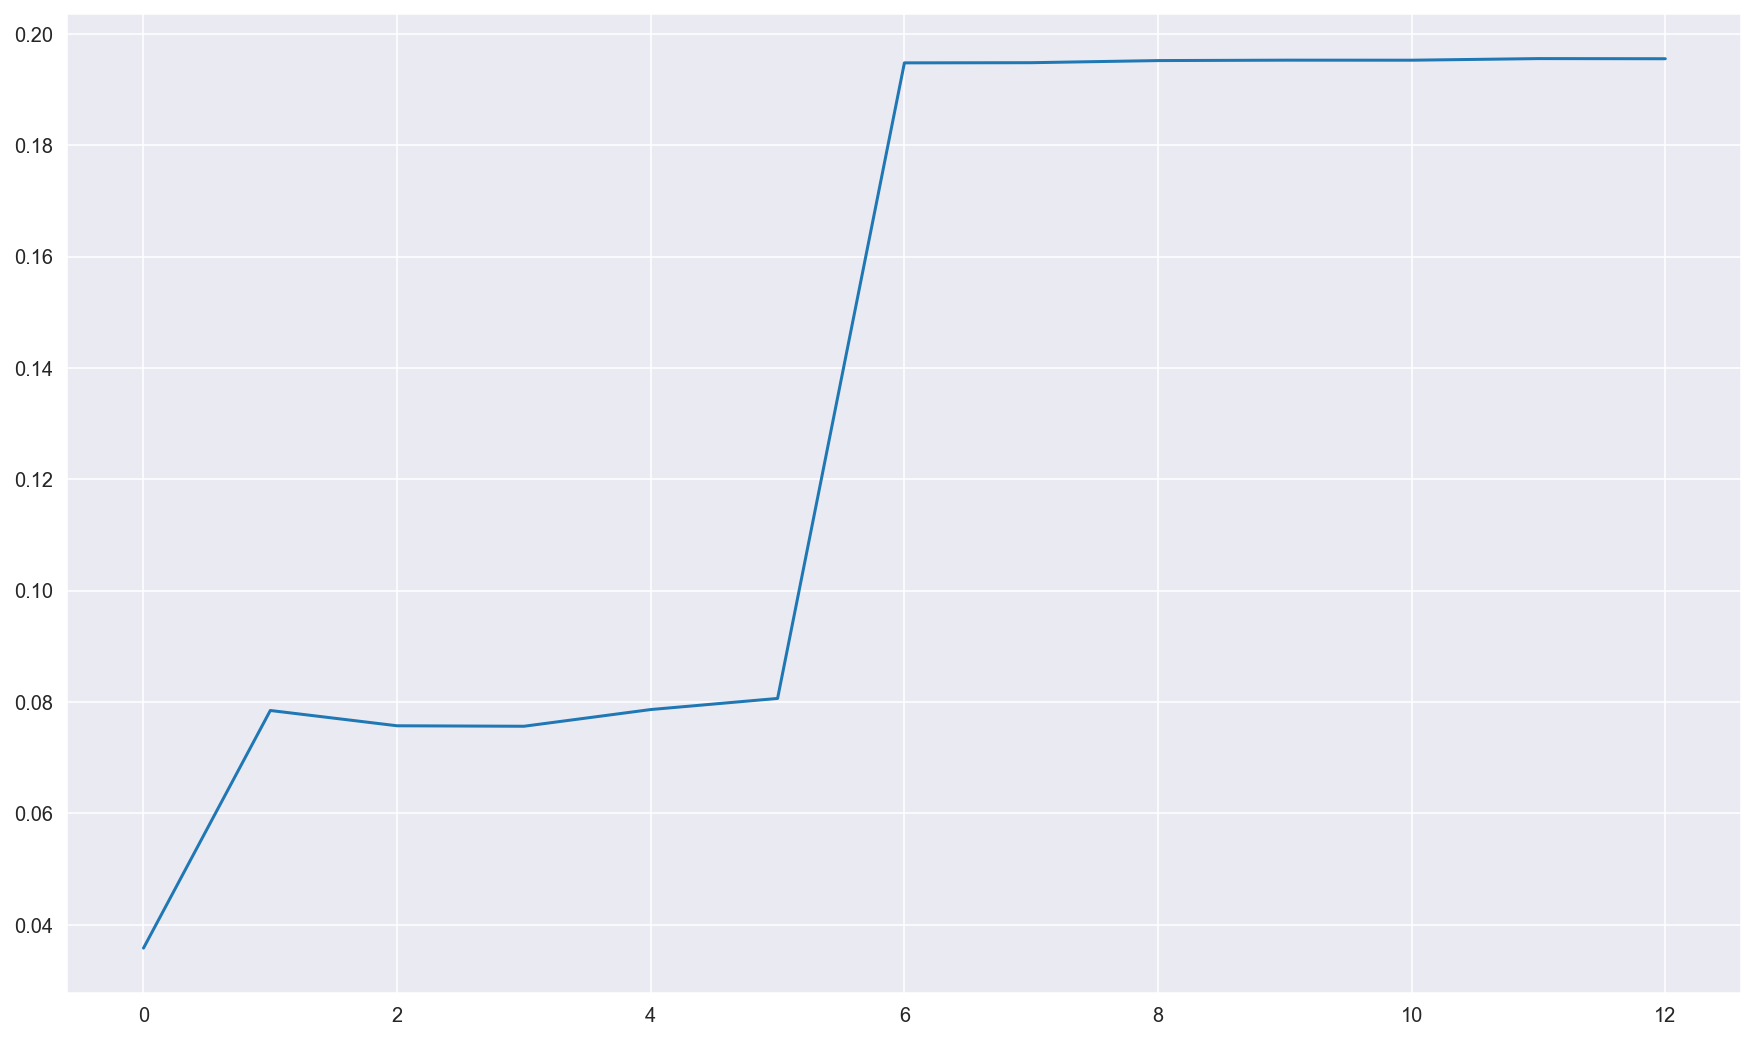

In [130]:
plt.plot(score_list)
plt.show()

In [131]:
from sklearn.feature_selection import RFE
model=LinearRegression()
rfe=RFE(model,8)

X_rfe=rfe.fit_transform(X_train,y_train)
model.fit(X_rfe,y_train)

print((rfe.support_),'\n')

print((rfe.ranking_),'\n')

X_r=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
X_r.columns=['col_name','support','ranking']
print(X_r)

[ True False  True False  True  True False False  True  True  True False
  True] 

[1 2 1 6 1 1 3 4 1 1 1 5 1] 

                         col_name  support  ranking
0                        Coverage     True        1
1                       Education    False        2
2                EmploymentStatus     True        1
3                          Income    False        6
4                  Marital_Status     True        1
5            Monthly_Premium_Auto     True        1
6         Months_Since_Last_Claim    False        3
7   Months_Since_Policy_Inception    False        4
8       Number_of_Open_Complaints     True        1
9              Number_of_Policies     True        1
10               Renew_Offer_Type     True        1
11             Total_Claim_Amount    False        5
12                  Vehicle_Class     True        1


In [132]:
def VIF(formula,data):
    import pip #To install packages
    #pip.main(["install","dmatrices"])
    #pip.main(["install","statsmodels"])
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) \
       for i in range(X.shape[1])]
    vif["features"] = X.columns
    return(vif.round(1))

In [133]:
VIF('Customer_Lifetime_Value~Coverage+Education+EmploymentStatus+Income+Marital_Status+Monthly_Premium_Auto+Months_Since_Last_Claim+Months_Since_Policy_Inception+Number_of_Open_Complaints+Number_of_Policies+Renew_Offer_Type+Total_Claim_Amount+Vehicle_Class',data = df)

,VIF Factor,features
0,37.9,Intercept
1,1.3,Coverage
2,1.0,Education
3,2.3,EmploymentStatus
4,2.2,Income
5,1.1,Marital_Status
6,2.2,Monthly_Premium_Auto
7,1.0,Months_Since_Last_Claim
8,1.0,Months_Since_Policy_Inception
9,1.0,Number_of_Open_Complaints


# MODEL BUILDING USING MACHINE LEARNING MODELS

In [134]:
def algo(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    print('{} train score:{}'.format(model,model.score(X_train,y_train)))
    print('{} test score:{}'.format(model,model.score(X_test,y_test)))

## LINEAR REGRESSION

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.30,random_state=42)
lr=LinearRegression()
algo(lr,X_train,X_test,y_train,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) train score:0.2088122859473308
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) test score:0.19746124836348666


## DECISION TREE REGRESSION

In [136]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
algo(dt,X_train,X_test,y_train,y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') train score:1.0
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') test score:0.493865551178817


## HYPER PARAMETER TUNING OF DECISION TREE

In [137]:
from sklearn.model_selection import GridSearchCV
gsv=GridSearchCV(dt,param_grid={'max_depth':range(1,10)})
gsv.fit(X_train,y_train)
gsv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## DECISION TREE AFTER HYPERTUNING

In [138]:
dt1=DecisionTreeRegressor(max_depth=4)
algo(dt1,X_train,X_test,y_train,y_test)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') train score:0.6801912308350204
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') test score:0.6494226649946313


## RANDOM FOREST REGRESSOR

In [139]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
algo(rfr,X_train,X_test,y_train,y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) train score:0.941336526589489
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) test score:0.6993973095265147


## HYPER PARAMETER TUNING OF RANDOM FOREST REGRESSOR

In [140]:
gsv=GridSearchCV(rfr,param_grid={'max_depth':range(1,10),'n_estimators':range(10,30)})
gsv.fit(X_train,y_train)
gsv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=28,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## RANDOM FOREST REGRESSOR AFTER HYPERTUNING

In [141]:
rfr1=RandomForestRegressor(max_depth=9,n_estimators=24)
algo(rfr1,X_train,X_test,y_train,y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=24,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) train score:0.8168845979486118
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=24,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) test score:0.6804174347927854


## K NEAREST NEIGHBORS REGRESSOR

In [142]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
algo(knn,X_train,X_test,y_train,y_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') train score:0.3252620854246041
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') test score:0.060164599331712254
